In [1]:
import math
from pathlib import Path
import sys
import numpy as np
import pandas as pd
from scipy import stats
import statistics

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
#import TCRemb_code2
#import TCRemb_code3
import tcremb.TCRemb as TCRemb
import tcremb.ml_utils as ml_utils
import tcremb.data_proc as data_proc

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


In [3]:
import warnings
warnings.filterwarnings('ignore')

# Paths

In [4]:
run_name = 'vdjdb_210124'
#raw_train_data_path = 'data/vdjdb.slim.txt'

In [5]:
label = 'antigen.epitope'
label_high = str(label + '_freq')
label_s = 'antigen.species'
tcr_columns = {'single': ['cdr3aa','v','j','chain'],'paired': {'TRA': ['a_cdr3aa', 'TRAV', 'TRAJ'],'TRB': [ 'b_cdr3aa', 'TRBV', 'TRBJ']}}
tcr_columns = ['cdr3aa','v','j','chain']
clonotype_id_column = 'cloneId'
data_id= 'data_id'
annotation_id = 'annotId'
pairing_id = 'barcode'
annotation_tcr_id_columns_dict = {'TRA': 'cloneId','TRB': 'cloneId','TRA_TRB': {'TRA':'cloneId_TRA', 'TRB':'cloneId_TRB'}}

In [6]:
outputs_path = "tcremb_outputs/" + run_name + '/'
Path(outputs_path).mkdir(parents=True, exist_ok=True)

In [7]:
data_preped_path = 'data/data_preped/VDJdb_data.csv'

In [8]:
#prototypes_path = { 'TRA' :'data/olga_humanTRA_3000.txt', 'TRB' : 'data/olga_humanTRB_3000.txt'}

In [9]:
#clonotypes_path = { 'TRA' : outputs_path + 'clonotypes_TRA.txt', 'TRB' : outputs_path + 'clonotypes_TRB.txt'}

In [10]:
#res_path = {'TRA' : outputs_path + 'res_TRA.txt', 'TRB': outputs_path + 'res_TRB.txt'}

# Data upload

In [11]:
data_preped = pd.read_csv(data_preped_path,sep='\t')

In [12]:
label_high_s = str(label_s + '_freq')

<Axes: xlabel='Count', ylabel='antigen.epitope_freq_20'>

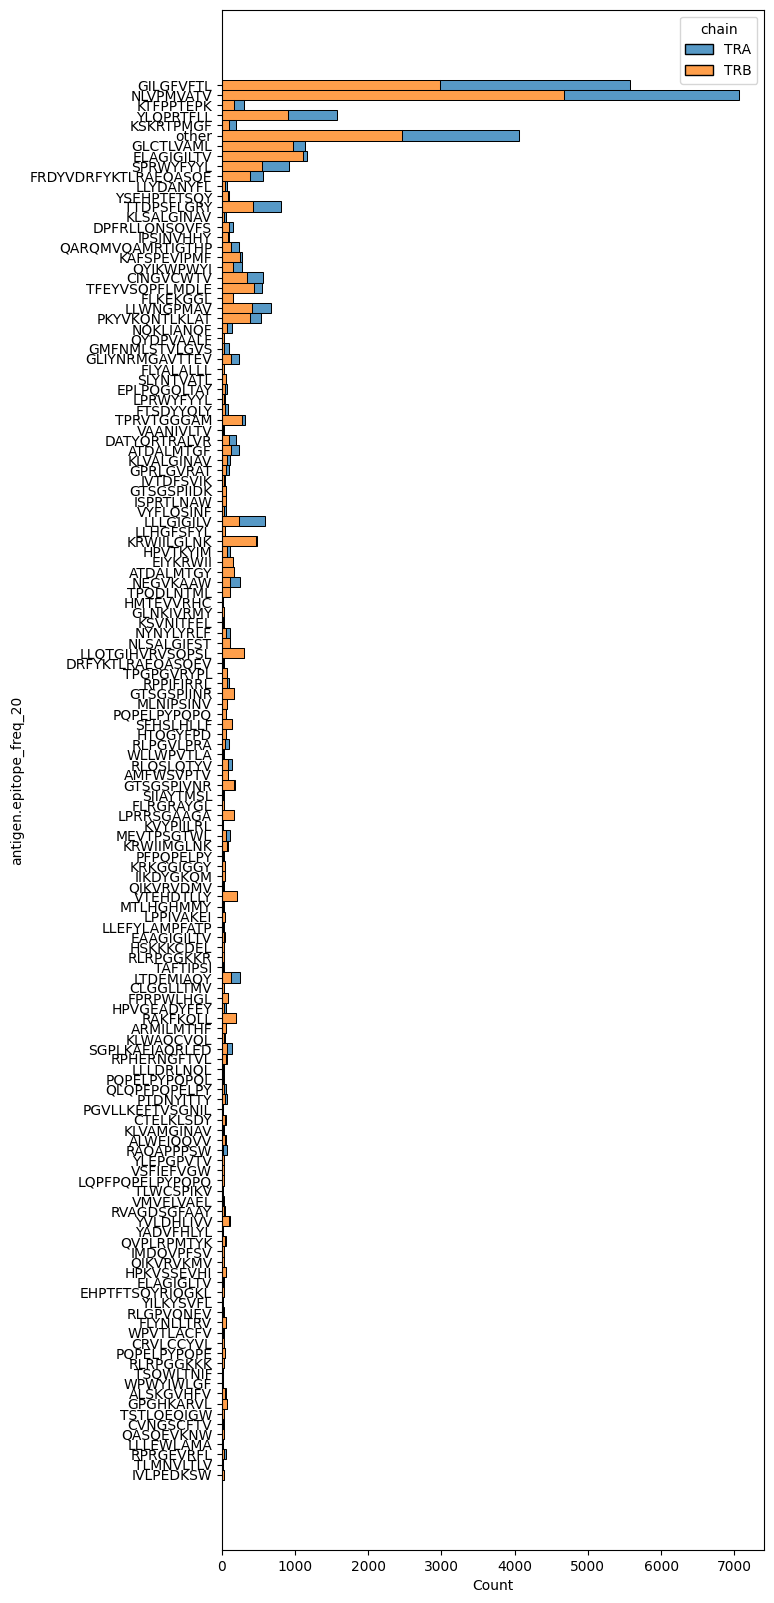

In [13]:
plt.figure(figsize=(7,20))
sns.histplot(data = data_preped, y = str(label+'_freq_20'),hue='chain',multiple='stack')

<Axes: xlabel='Count', ylabel='antigen.epitope_freq'>

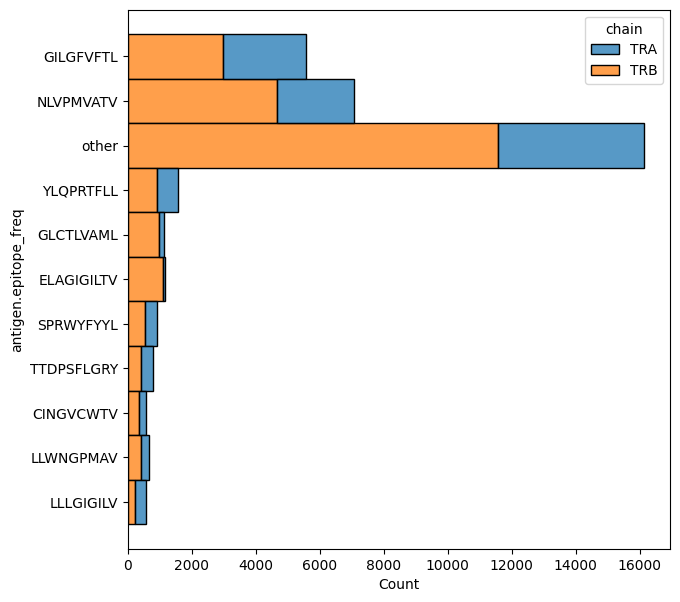

In [14]:
plt.figure(figsize=(7,7))
sns.histplot(data = data_preped, y = str(label+'_freq'),hue='chain',multiple='stack',binwidth=1)

In [15]:
data_preped[str(label + '_freq_500')].drop_duplicates()

0                 GILGFVFTL
2                 NLVPMVATV
3                     other
4                 YLQPRTFLL
13                GLCTLVAML
18               ELAGIGILTV
20                SPRWYFYYL
21     FRDYVDRFYKTLRAEQASQE
26               TTDPSFLGRY
36                CINGVCWTV
39           TFEYVSQPFLMDLE
44                LLWNGPMAV
47            PKYVKQNTLKLAT
130               LLLGIGILV
Name: antigen.epitope_freq_500, dtype: object

In [16]:
label_high_s = str(label_s + '_freq')
label_high_s_1000 = str(label_s + '_freq_1000')

<Axes: xlabel='Count', ylabel='antigen.species_freq'>

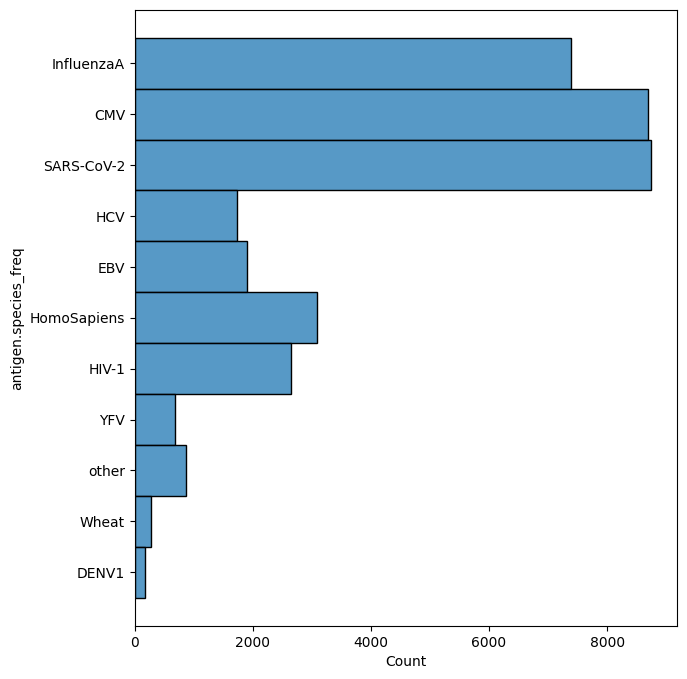

In [17]:
plt.figure(figsize=(7,8))
sns.histplot(y=data_preped[label_high_s])

# Try TCRemb module

In [18]:
run_name

'vdjdb_210124'

['/home/ykremlyakova/projects/tcr_emb', '/home/ykremlyakova/.conda/envs/py311/lib/python311.zip', '/home/ykremlyakova/.conda/envs/py311/lib/python3.11', '/home/ykremlyakova/.conda/envs/py311/lib/python3.11/lib-dynload', '', '/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages', '../', 'mirpy/']


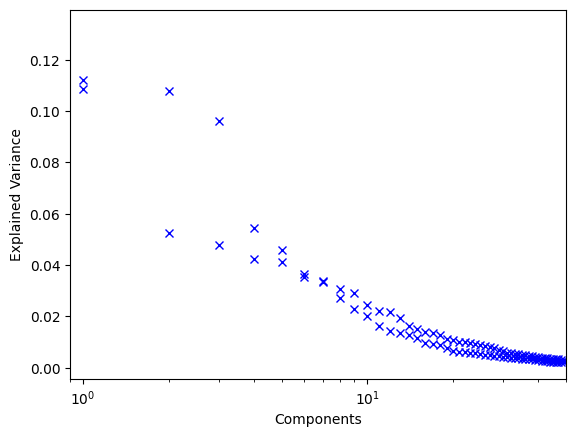

In [19]:
tcremb = TCRemb.TCRemb(run_name)
tcremb.tcremb_clonotypes('TRA',data_preped)
tcremb.tcremb_clonotypes('TRB',data_preped)
#tcremb.tcremb_clonotype_label_pairs('TRA',label)
#tcremb.tcremb_clonotype_label_pairs('TRB',label)
#tcremb.tcremb_dists_count('TRA')
#tcremb.tcremb_dists_count('TRB')
tcremb.tcremb_dists('TRA')
tcremb.tcremb_dists('TRB')
tcremb.tcremb_pca('TRA')
tcremb.tcremb_pca('TRB')
tcremb.tcremb_tsne('TRA')
tcremb.tcremb_tsne('TRB')

# Analysis

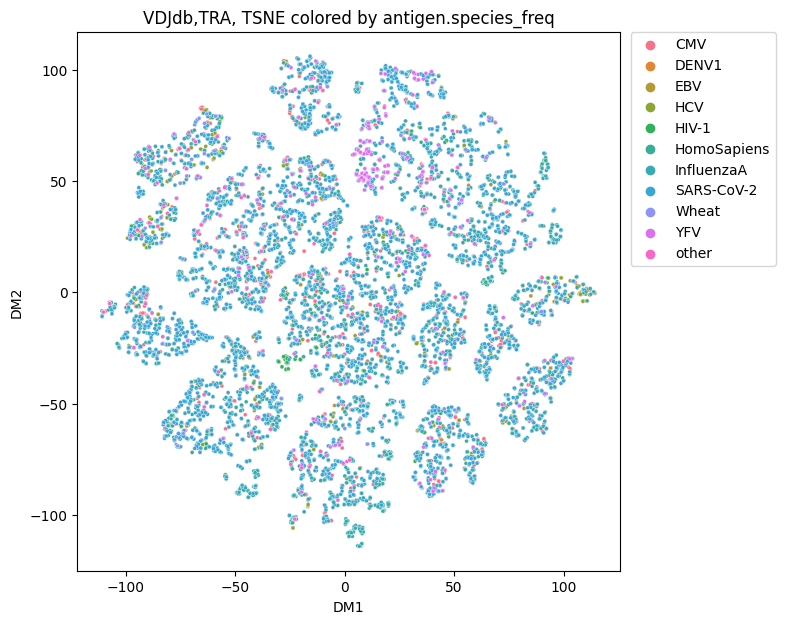

In [35]:
chain = 'TRA'
ml_utils.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), label_high_s, f'VDJdb,{chain}, TSNE colored by {label_high_s}')

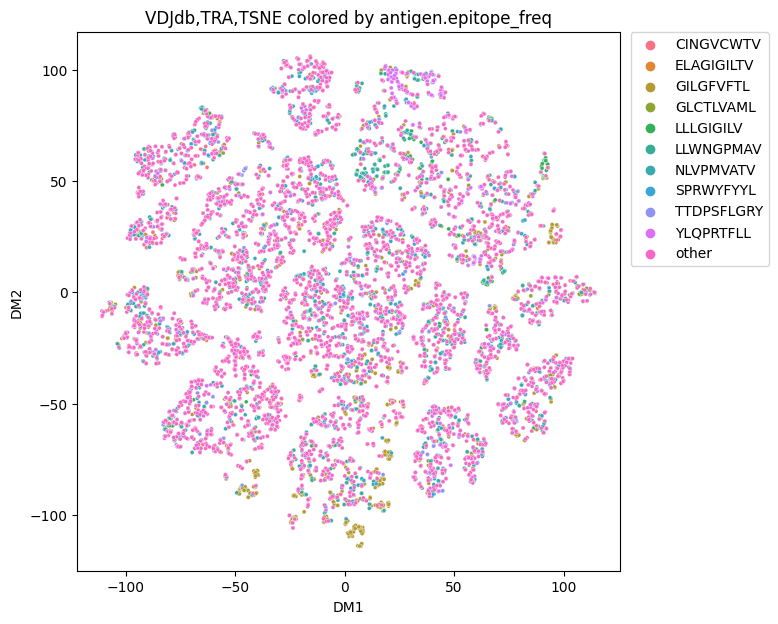

In [36]:
chain = 'TRA'
ml_utils.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]),  label_high, f'VDJdb,{chain},TSNE colored by {label_high}')

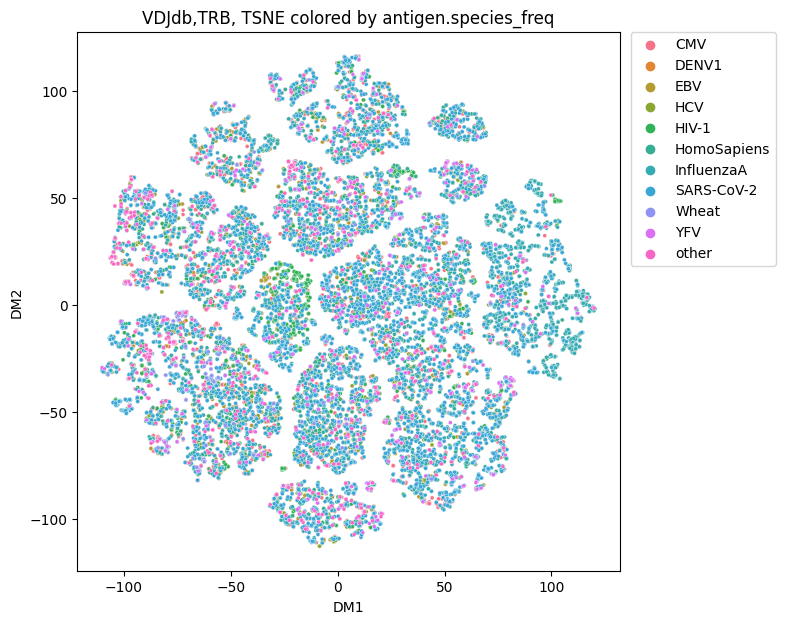

In [37]:
chain = 'TRB'
ml_utils.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), label_high_s, f'VDJdb,{chain}, TSNE colored by {label_high_s}')

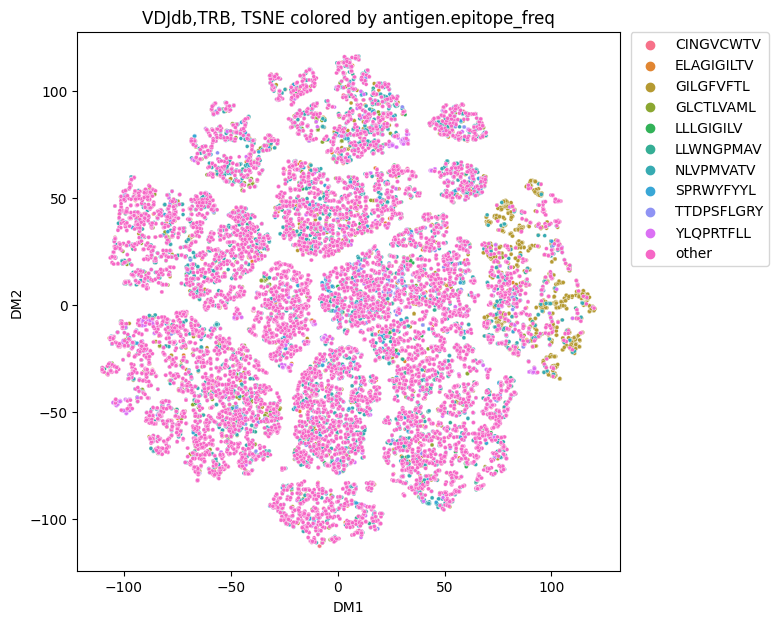

In [38]:
chain = 'TRB'
ml_utils.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), label_high, f'VDJdb,{chain}, TSNE colored by {label_high}')

## Clustering

### Evaluation

In [ ]:
clstr_scores_dict = {}

In [ ]:
evaluation_type = 'tunnining_all_labels'
clstr_scores_dict[evaluation_type]={}

In [ ]:
chain = 'TRA'
label_cl = label
y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain].drop(annotation_id, axis=1, errors = 'ignore')

data_len = len(y_data)

range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)
                    ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                    , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
comon_params = {'n_clusters' : range_n_clusters, 'n_neighbors': [2, 5, 10, 50]}
clstr_params = {
    'Agglomerativ':
    {'n_clusters': comon_params['n_clusters']*4,
     'linkage': ['average']*14 + ['complete']*14 + ['ward']*14 + ['single']*14,
     'connectivity': pd.Series(comon_params['n_neighbors'] * 14).apply(lambda x: TCRemb_code2.connectivity_kneighbors_graph(X_data, x))
    },
    'KMeans': 
    {'n_clusters': comon_params['n_clusters'],
     'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    },
    'Birch':
    {'n_clusters': comon_params['n_clusters']
    },
    'DBSCAN':
    {'eps': [0.2, 0.3, 0.4, 0.5 ,0.6, 0.7 ,0.8, 0.9]
    }
}
clstr_scores_dict[evaluation_type][chain] = TCRemb_code2.run_bench_clustering(y_data, X_data, clstr_params)

clstr_scores_dict[evaluation_type][chain] = pd.DataFrame(clstr_scores_dict[evaluation_type][chain])
clstr_scores_dict[evaluation_type][chain]['metrics_sum'] = clstr_scores_dict[evaluation_type][chain]['v_measure_score'] + clstr_scores_dict[evaluation_type][chain]['adjusted_rand_score'] + clstr_scores_dict[evaluation_type][chain]['adjusted_mutual_info_score']+ clstr_scores_dict[evaluation_type][chain]['silhouette_score']

for i in list(clstr_scores_dict[evaluation_type][chain].sort_values('metrics_sum').tail(10).index):
    print(pd.DataFrame(clstr_scores_dict[evaluation_type][chain]).iloc[i]['model'])
clstr_scores_dict[evaluation_type][chain].sort_values('metrics_sum').tail(10)

In [ ]:
chain = 'TRB'
y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain].drop(annotation_id, axis=1, errors = 'ignore')

data_len = len(y_data)

range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)
                    ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                    , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
comon_params = {'n_clusters' : range_n_clusters, 'n_neighbors': [2, 5, 10, 50]}
clstr_params = {
    'Agglomerativ':
    {'n_clusters': comon_params['n_clusters']*4,
     'linkage': ['average']*14 + ['complete']*14 + ['ward']*14 + ['single']*14,
     'connectivity': pd.Series(comon_params['n_neighbors'] * 14).apply(lambda x: TCRemb_code2.connectivity_kneighbors_graph(X_data, x))
    },
    'KMeans': 
    {'n_clusters': comon_params['n_clusters'],
     'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    },
    'Birch':
    {'n_clusters': comon_params['n_clusters']
    },
    'DBSCAN':
    {'eps': [0.2, 0.3, 0.4, 0.5 ,0.6, 0.7 ,0.8, 0.9]
    }
}
clstr_scores_dict[evaluation_type][chain] = TCRemb_code2.run_bench_clustering(y_data, X_data, clstr_params)

clstr_scores_dict[evaluation_type][chain] = pd.DataFrame(clstr_scores_dict[evaluation_type][chain])
clstr_scores_dict[evaluation_type][chain]['metrics_sum'] = clstr_scores_dict[evaluation_type][chain]['v_measure_score'] + clstr_scores_dict[evaluation_type][chain]['adjusted_rand_score'] + clstr_scores_dict[evaluation_type][chain]['adjusted_mutual_info_score']+ clstr_scores_dict[evaluation_type][chain]['silhouette_score']

for i in list(clstr_scores_dict[evaluation_type][chain].sort_values('metrics_sum').tail(10).index):
    print(pd.DataFrame(clstr_scores_dict[evaluation_type][chain]).iloc[i]['model'])
clstr_scores_dict[evaluation_type][chain].sort_values('metrics_sum').tail(10)

In [ ]:
evaluation_type = 'tunnining_label_high'
clstr_scores_dict[evaluation_type]={}

In [ ]:
chain = 'TRA'
label_cl = label_high
y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain].drop(annotation_id, axis=1, errors = 'ignore')

data_len = len(y_data)

range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)
                    ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                    , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
comon_params = {'n_clusters' : range_n_clusters, 'n_neighbors': [2, 5, 10, 50]}
clstr_params = {
    'Agglomerativ':
    {'n_clusters': comon_params['n_clusters']*4,
     'linkage': ['average']*14 + ['complete']*14 + ['ward']*14 + ['single']*14,
     'connectivity': pd.Series(comon_params['n_neighbors'] * 14).apply(lambda x: TCRemb_code2.connectivity_kneighbors_graph(X_data, x))
    },
    'KMeans': 
    {'n_clusters': comon_params['n_clusters'],
     'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    },
    'Birch':
    {'n_clusters': comon_params['n_clusters']
    },
    'DBSCAN':
    {'eps': [0.2, 0.3, 0.4, 0.5 ,0.6, 0.7 ,0.8, 0.9]
    }
}
clstr_scores_dict[evaluation_type][chain] = TCRemb_code2.run_bench_clustering(y_data, X_data, clstr_params)

clstr_scores_dict[evaluation_type][chain] = pd.DataFrame(clstr_scores_dict[evaluation_type][chain])
clstr_scores_dict[evaluation_type][chain]['metrics_sum'] = clstr_scores_dict[evaluation_type][chain]['v_measure_score'] + clstr_scores_dict[evaluation_type][chain]['adjusted_rand_score'] + clstr_scores_dict[evaluation_type][chain]['adjusted_mutual_info_score']+ clstr_scores_dict[evaluation_type][chain]['silhouette_score']

for i in list(clstr_scores_dict[evaluation_type][chain].sort_values('metrics_sum').tail(10).index):
    print(pd.DataFrame(clstr_scores_dict[evaluation_type][chain]).iloc[i]['model'])
clstr_scores_dict[evaluation_type][chain].sort_values('metrics_sum').tail(10)

In [ ]:
chain = 'TRB'
label_cl = label_high
y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain].drop(annotation_id, axis=1, errors = 'ignore')

data_len = len(y_data)

range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)
                    ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                    , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
comon_params = {'n_clusters' : range_n_clusters, 'n_neighbors': [2, 5, 10, 50]}
clstr_params = {
    'Agglomerativ':
    {'n_clusters': comon_params['n_clusters']*4,
     'linkage': ['average']*14 + ['complete']*14 + ['ward']*14 + ['single']*14,
     'connectivity': pd.Series(comon_params['n_neighbors'] * 14).apply(lambda x: TCRemb_code2.connectivity_kneighbors_graph(X_data, x))
    },
    'KMeans': 
    {'n_clusters': comon_params['n_clusters'],
     'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    },
    'Birch':
    {'n_clusters': comon_params['n_clusters']
    },
    'DBSCAN':
    {'eps': [0.2, 0.3, 0.4, 0.5 ,0.6, 0.7 ,0.8, 0.9]
    }
}
clstr_scores_dict[evaluation_type][chain] = TCRemb_code2.run_bench_clustering(y_data, X_data, clstr_params)

clstr_scores_dict[evaluation_type][chain] = pd.DataFrame(clstr_scores_dict[evaluation_type][chain])
clstr_scores_dict[evaluation_type][chain]['metrics_sum'] = clstr_scores_dict[evaluation_type][chain]['v_measure_score'] + clstr_scores_dict[evaluation_type][chain]['adjusted_rand_score'] + clstr_scores_dict[evaluation_type][chain]['adjusted_mutual_info_score']+ clstr_scores_dict[evaluation_type][chain]['silhouette_score']

for i in list(clstr_scores_dict[evaluation_type][chain].sort_values('metrics_sum').tail(10).index):
    print(pd.DataFrame(clstr_scores_dict[evaluation_type][chain]).iloc[i]['model'])
clstr_scores_dict[evaluation_type][chain].sort_values('metrics_sum').tail(10)

### KMeans

In [20]:
kmeans = TCRemb.TCRemb_clustering('KMeans')

In [21]:
chain='TRA'
n_clusters = 5295
random_state = 8
model =  KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.clstr(chain,tcremb, label, model)

mean fraction_matched only clusters: 0.5674639205486655
median fraction_matched only clusters: 0.5
purity:0.5680881747012773


In [21]:
chain='TRB'
n_clusters = 10616
random_state = 8
model =  KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.clstr(chain,tcremb, label,model)

mean fraction_matched only clusters: 0.5510098483648065
median fraction_matched only clusters: 0.5
purity:0.5572001876270392


<Axes: xlabel='fraction_matched', ylabel='Density'>

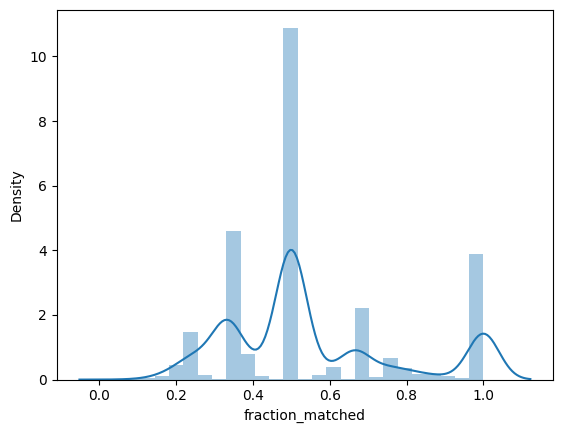

In [22]:
sns.distplot(kmeans.binom_res[chain][kmeans.binom_res[chain]['is_cluster']==1]['fraction_matched'])

In [23]:
list(kmeans.clstr_labels['TRA'][kmeans.clstr_labels['TRA']['cluster']==60].merge(tcremb.annot['TRA'][['annotId','cdr3aa','v','j']])['cdr3aa'])

['CVVNEDNDMRF',
 'CVVNNQDDMRF',
 'CVVNKDNDMRF',
 'CVVNSRDDMRF',
 'CVVNERDNLFF',
 'CVVNRDNDMRF',
 'CVVNRADDMRF',
 'CVVNRANDMRF',
 'CVVNRNDDMRF',
 'CVVNREDNLFF',
 'CVVNEENDMRF',
 'CVVNRMNDMRF',
 'CVVNKYNDMRF',
 'CVVNQYNDMRF',
 'CVVNNEDDMRF',
 'CVVNMENDMRF',
 'CVVNKENNLFF',
 'CVVNYDNDMRF',
 'CVVNKNDDMRF']

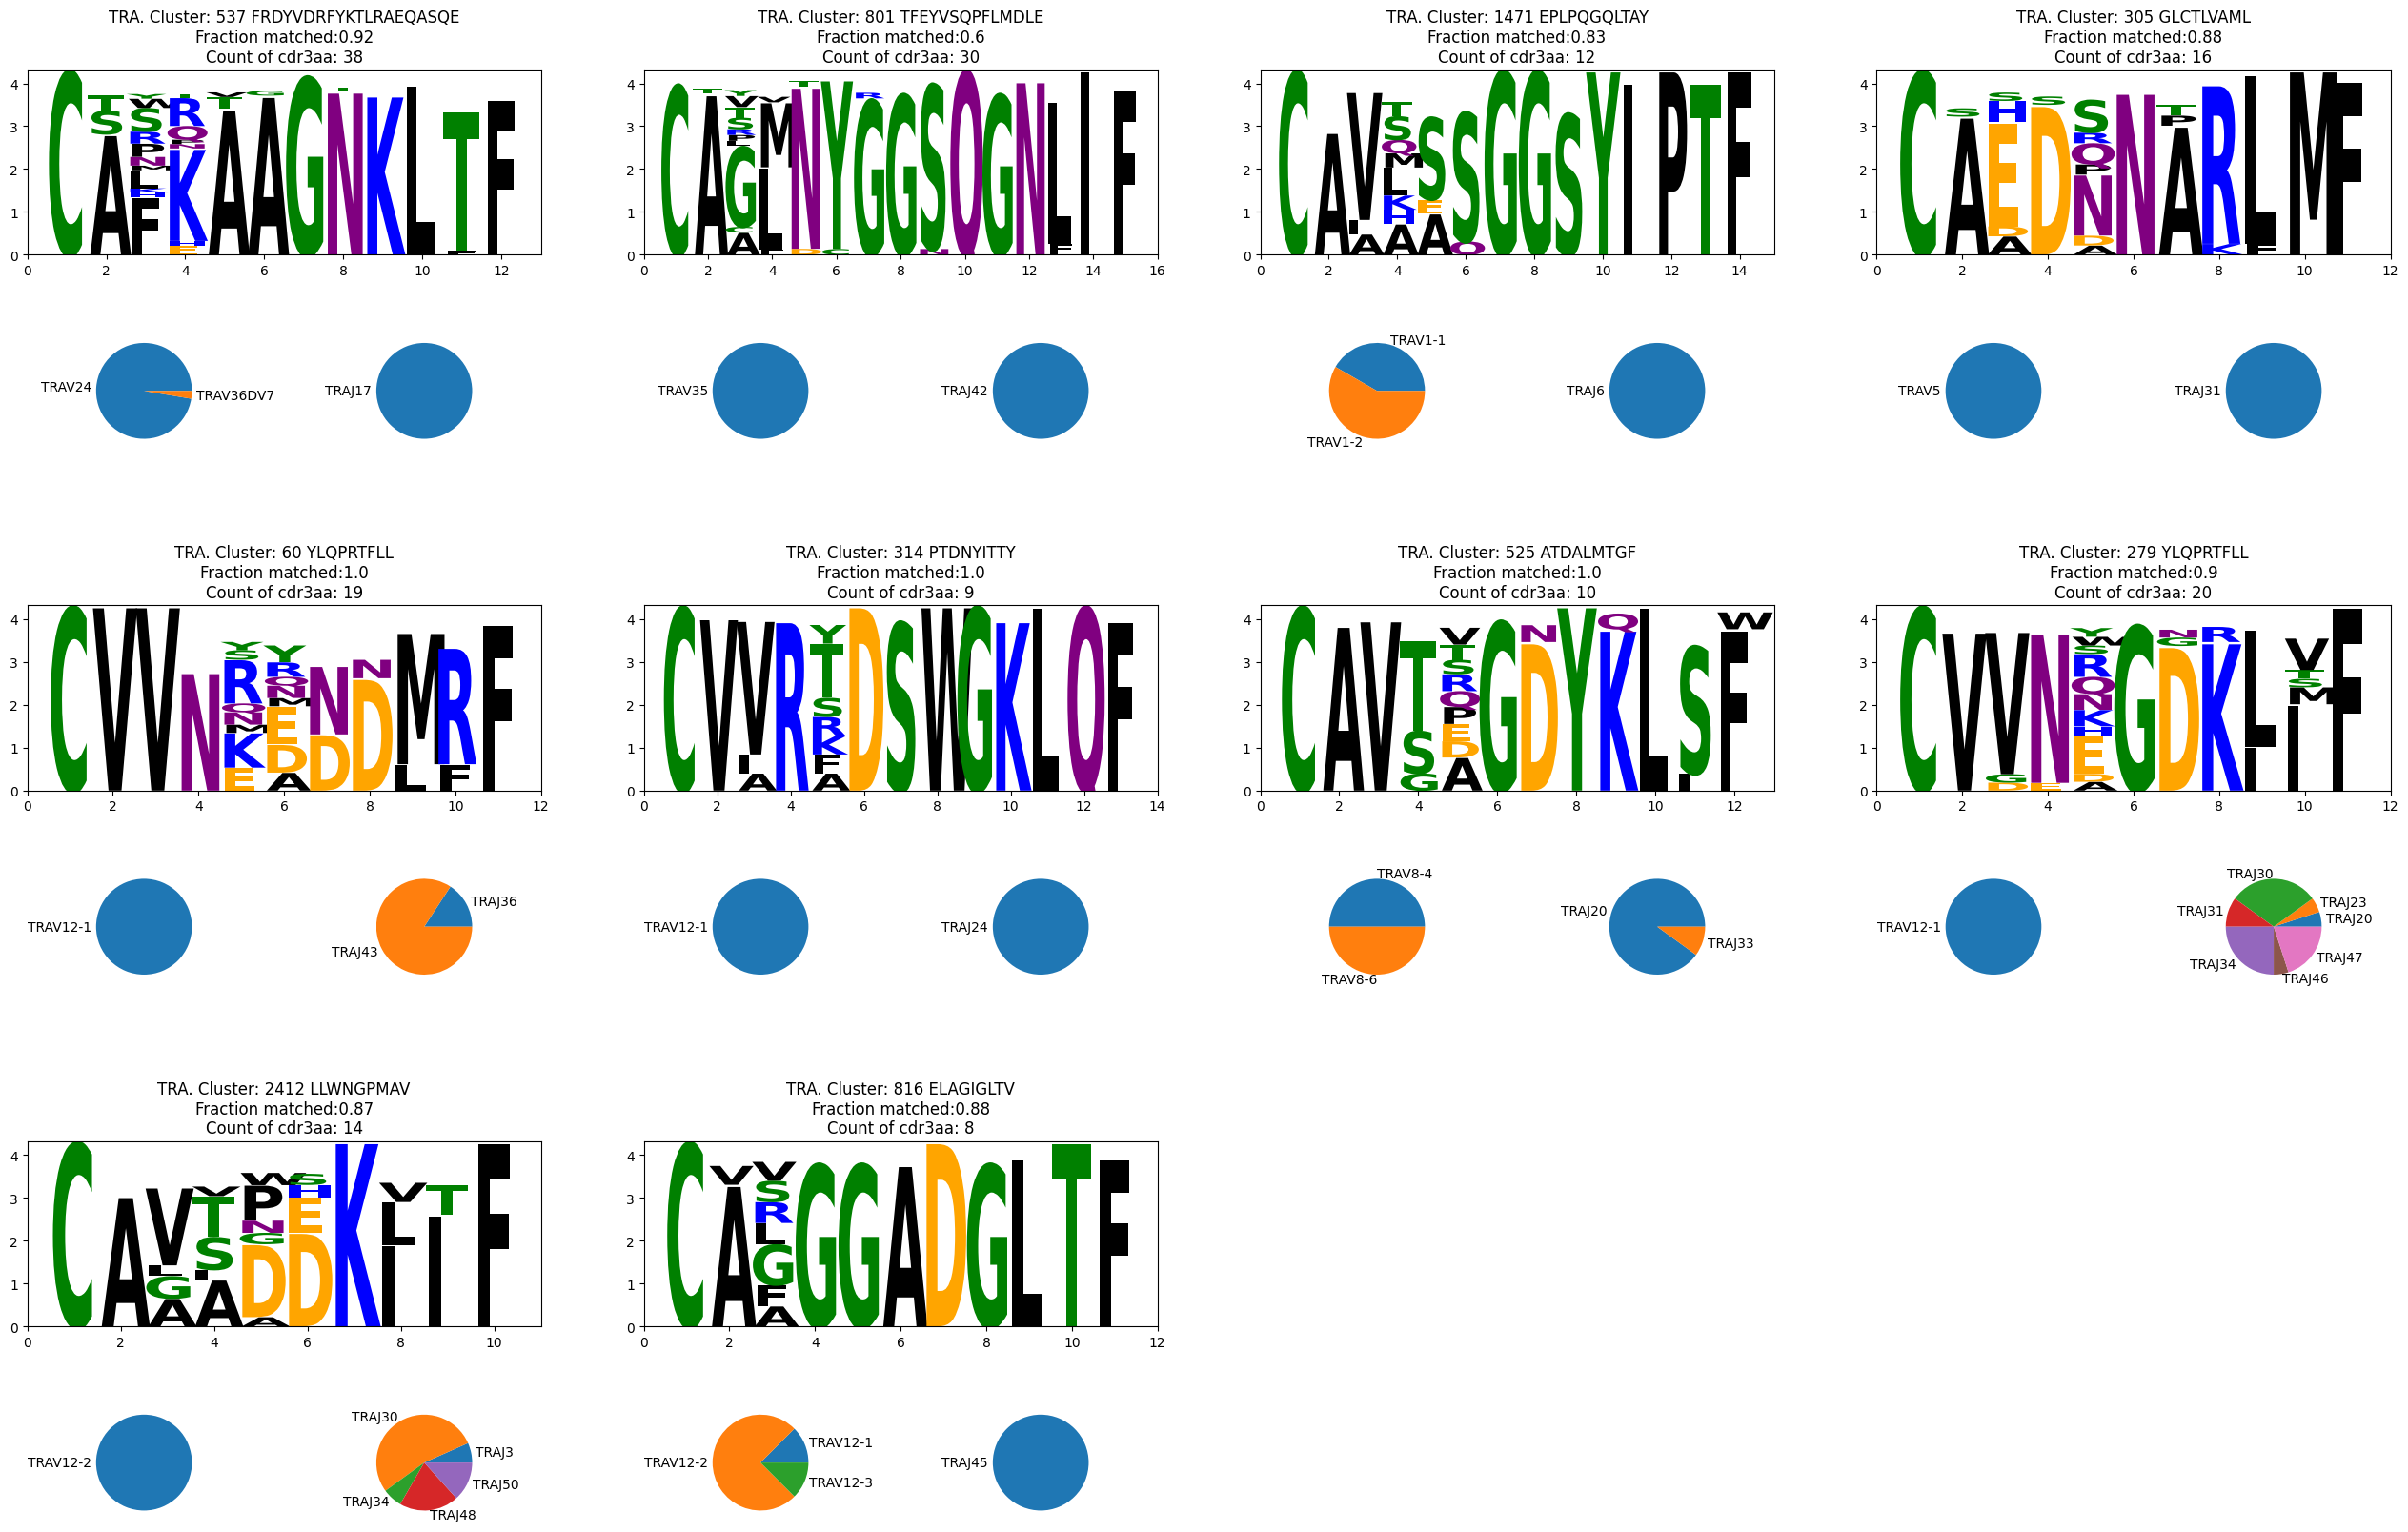

In [24]:
chain = 'TRA'
kmeans.clstrs_motif(tcremb, chain, 10)

In [ ]:
chain = 'TRB'
kmeans.clstrs_motif(tcremb, chain, 10)

In [31]:
kmeans_s = TCRemb.TCRemb_clustering('KMeans_s')
chain='TRA'
n_clusters = 5295
random_state = 8
model =  KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans_s.clstr(chain,tcremb, label_s, model)

chain='TRB'
n_clusters = 10616
random_state = 8
model =  KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans_s.clstr(chain,tcremb, label_s,model)

mean fraction_matched only clusters: 0.6585397028810982
median fraction_matched only clusters: 0.6
purity:0.6605590062111801
mean fraction_matched only clusters: 0.6249354168004122
median fraction_matched only clusters: 0.5
purity:0.6301861287303733


In [45]:
sns.distplot(kmeans_s.binom_res[chain][kmeans.binom_res[chain]['is_cluster']==1]['fraction_matched'])

'antigen.species'

In [ ]:
for e in label_freq_dict['antigen.epitope_freq_1000']:
    t = pd.merge(tcremb['tsne'][chain],tcremb['clstr_labels'][model_name][chain],on=annotation_id)
    t[e]=t['label_cluster'].apply(lambda x: x if x==e else 'other')
    TCRemb_code2.tsne_plot(t, e, f'10x ,{chain}', f'TSNE colored by {e}', True)

In [ ]:
for e in ['HPVGEADYFEY','HTQGYFPD','IPSINVHHY','FLYALALLL','PTDNYITTY']:
    t = pd.merge(tcremb['tsne'][chain],tcremb['clstr_labels'][model_name][chain],on=annotation_id)
    t[e]=t['label_cluster'].apply(lambda x: x if x==e else 'other')
    TCRemb_code2.tsne_plot(t, e, f'10x ,{chain}', f'TSNE colored by {e}', True)

In [ ]:
for e in label_freq_dict['antigen.epitope_freq_1000']:
    t = pd.merge(tcremb['tsne'][chain],tcremb['clstr_labels'][model_name][chain],on=annotation_id)
    t[e]=t['label_cluster'].apply(lambda x: x if x==e else 'other')
    TCRemb_code2.tsne_plot(t, e, f'10x ,{chain}', f'TSNE colored by {e}', True)

In [ ]:
sns.distplot(kmeans.binom_res[chain][kmeans.binom_res[chain]['is_cluster']==1]['fraction_matched'])

In [ ]:
sns.histplot(kmeans.clstr_labels[chain]['enriched_clstr'].astype(str))
plt.title('count of tcrs in enriched clusters')

## classification

### Evaluatiom

In [ ]:
clsf_scores_dict = {}
best_clsf_dict = {}
all_clsf_scores_dict = {}

In [ ]:
evaluation_type = 'tunnining_all_labels'
clsf_scores_dict[evaluation_type] = {'TRA': {}, 'TRB':{}}
best_clsf_dict[evaluation_type] = {'TRA': {}, 'TRB':{}}
all_clsf_scores_dict[evaluation_type] = {'TRA': {}, 'TRB':{}}

In [ ]:

chain = 'TRA'
y_data = tcremb['annot'][chain][label]
X_data = tcremb['pca'][chain].drop(annotation_id, axis=1, errors = 'ignore')


common_params = {'param_range': [1, 2, 3, 4, 5, 6],
                 'param_range_2': [5, 7, 10, 15,20,25,30],
                 'param_range_3': [4, 5, 6, 7, 8],
                'n_estimators': [50,100,150]
                }

clsf_paramms = {
    #'KNN':
    #{'KNN__leaf_size':common_params['param_range_2'],
    # 'KNN__n_neighbors':common_params['param_range_3'],
    # 'KNN__weights':['uniform', 'distance']
    #},
    'AB':
    {'AB__n_estimators':common_params['n_estimators']
    },
    'SVM':
    {'SVM__C': common_params['param_range_3'],
    'SVM__kernel':[ 'poly','rbf']
    },
    'RF':
    {'RF__min_samples_leaf': common_params['param_range'],
    'RF__max_depth': common_params['param_range_2'], 
    'RF__min_samples_split':common_params['param_range'][1:],
     'RF__n_estimators':common_params['n_estimators']
    }, 
    'LR':
    {'LR__C':common_params['param_range'],
     'LR__multi_class': ['ovr'],
     'LR__max_iter': [10000]
    },
}

    
y_train, y_test,X_train, X_test,  = train_test_split(y_data, X_data ,test_size=0.3)
best_clsf_dict[evaluation_type][chain], clsf_scores_dict[evaluation_type][chain], all_clsf_scores_dict[evaluation_type][chain] = TCRemb_code2.clf_evaluate_models(X_train, y_train, X_test, y_test, clsf_paramms,n_splits=5, scoring_func='f1_weighted', debug=True)    


In [ ]:

chain = 'TRB'
y_data = tcremb['annot'][chain][label]
X_data = tcremb['pca'][chain].drop(annotation_id, axis=1, errors = 'ignore')


common_params = {'param_range': [1, 2, 3, 4, 5, 6],
                 'param_range_2': [5, 7, 10, 15,20,25,30],
                 'param_range_3': [4, 5, 6, 7, 8],
                'n_estimators': [50,100,150]
                }

clsf_paramms = {
    #'KNN':
    #{'KNN__leaf_size':common_params['param_range_2'],
    # 'KNN__n_neighbors':common_params['param_range_3'],
    # 'KNN__weights':['uniform', 'distance']
    #},
    'AB':
    {'AB__n_estimators':common_params['n_estimators']
    },
    'SVM':
    {'SVM__C': common_params['param_range_3'],
    'SVM__kernel':[ 'poly','rbf']
    },
    'RF':
    {'RF__min_samples_leaf': common_params['param_range'],
    'RF__max_depth': common_params['param_range_2'], 
    'RF__min_samples_split':common_params['param_range'][1:],
     'RF__n_estimators':common_params['n_estimators']
    }, 
    'LR':
    {'LR__C':common_params['param_range'],
     'LR__multi_class': ['ovr'],
     'LR__max_iter': [10000]
    },
}

    
y_train, y_test,X_train, X_test,  = train_test_split(y_data, X_data ,test_size=0.3)
best_clsf_dict[evaluation_type][chain], clsf_scores_dict[evaluation_type][chain], all_clsf_scores_dict[evaluation_type][chain] = TCRemb_code2.clf_evaluate_models(X_train, y_train, X_test, y_test, clsf_paramms,n_splits=5, scoring_func='f1_weighted', debug=True)    


In [ ]:
evaluation_type = 'tunnining_label_high'
clsf_scores_dict[evaluation_type] = {'TRA': {}, 'TRB':{}}
best_clsf_dict[evaluation_type] = {'TRA': {}, 'TRB':{}}
all_clsf_scores_dict[evaluation_type] = {'TRA': {}, 'TRB':{}}

In [ ]:

chain = 'TRA'
label_cl = label_high
y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain].drop(annotation_id, axis=1, errors = 'ignore')


common_params = {'param_range': [1, 2, 3, 4, 5, 6],
                 'param_range_2': [5, 7, 10, 15,20,25,30],
                 'param_range_3': [4, 5, 6, 7, 8],
                'n_estimators': [50,100,150]
                }

clsf_paramms = {
    #'KNN':
    #{'KNN__leaf_size':common_params['param_range_2'],
    # 'KNN__n_neighbors':common_params['param_range_3'],
    # 'KNN__weights':['uniform', 'distance']
    #},
    'AB':
    {'AB__n_estimators':common_params['n_estimators']
    },
    'SVM':
    {'SVM__C': common_params['param_range_3'],
    'SVM__kernel':[ 'poly','rbf']
    },
    'RF':
    {'RF__min_samples_leaf': common_params['param_range'],
    'RF__max_depth': common_params['param_range_2'], 
    'RF__min_samples_split':common_params['param_range'][1:],
     'RF__n_estimators':common_params['n_estimators']
    }, 
    'LR':
    {'LR__C':common_params['param_range'],
     'LR__multi_class': ['ovr'],
     'LR__max_iter': [10000]
    },
}

    
y_train, y_test,X_train, X_test,  = train_test_split(y_data, X_data ,test_size=0.3)
best_clsf_dict[evaluation_type][chain], clsf_scores_dict[evaluation_type][chain], all_clsf_scores_dict[evaluation_type][chain] = TCRemb_code2.clf_evaluate_models(X_train, y_train, X_test, y_test, clsf_paramms,n_splits=5, scoring_func='f1_weighted', debug=True)    


In [ ]:

chain = 'TRB'
label_cl = label_high
y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain].drop(annotation_id, axis=1, errors = 'ignore')


common_params = {'param_range': [1, 2, 3, 4, 5, 6],
                 'param_range_2': [5, 7, 10, 15,20,25,30],
                 'param_range_3': [4, 5, 6, 7, 8],
                'n_estimators': [50,100,150]
                }

clsf_paramms = {
    #'KNN':
    #{'KNN__leaf_size':common_params['param_range_2'],
    # 'KNN__n_neighbors':common_params['param_range_3'],
    # 'KNN__weights':['uniform', 'distance']
    #},
    'AB':
    {'AB__n_estimators':common_params['n_estimators']
    },
    'SVM':
    {'SVM__C': common_params['param_range_3'],
    'SVM__kernel':[ 'poly','rbf']
    },
    'RF':
    {'RF__min_samples_leaf': common_params['param_range'],
    'RF__max_depth': common_params['param_range_2'], 
    'RF__min_samples_split':common_params['param_range'][1:],
     'RF__n_estimators':common_params['n_estimators']
    }, 
    'LR':
    {'LR__C':common_params['param_range'],
     'LR__multi_class': ['ovr'],
     'LR__max_iter': [10000]
    },
}

    
y_train, y_test,X_train, X_test,  = train_test_split(y_data, X_data ,test_size=0.3)
best_clsf_dict[evaluation_type][chain], clsf_scores_dict[evaluation_type][chain], all_clsf_scores_dict[evaluation_type][chain] = TCRemb_code2.clf_evaluate_models(X_train, y_train, X_test, y_test, clsf_paramms,n_splits=5, scoring_func='f1_weighted', debug=True)    


### RF

In [54]:
clf = TCRemb.TCRemb_clf('RF__freq')
chain='TRA'
max_depth = 20
model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clf.clf(chain,tcremb, label_high, model=model,test_size=0.15)

Train accuracy: 0.9765395894428153
Test accuracy: 0.47840531561461797
macro: {'f1': 0.31327562016990096, 'precision': 0.27139496226029364, 'recall': 0.49622356517108485}
weighted: {'f1': 0.5212132535798627, 'precision': 0.6515687228395209, 'recall': 0.47840531561461797}


In [55]:
chain='TRB'
max_depth = 20
model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clf.clf(chain,tcremb, label_high, model, test_size=0.15)

Train accuracy: 0.9556736724045448
Test accuracy: 0.562707182320442
macro: {'f1': 0.23153449749782826, 'precision': 0.20590918429141516, 'recall': 0.584709756204477}
weighted: {'f1': 0.6503349517942019, 'precision': 0.8589306450066131, 'recall': 0.562707182320442}


accuracy: 0.48
f1_weighted:0.52
precision:0.65
recall:0.48


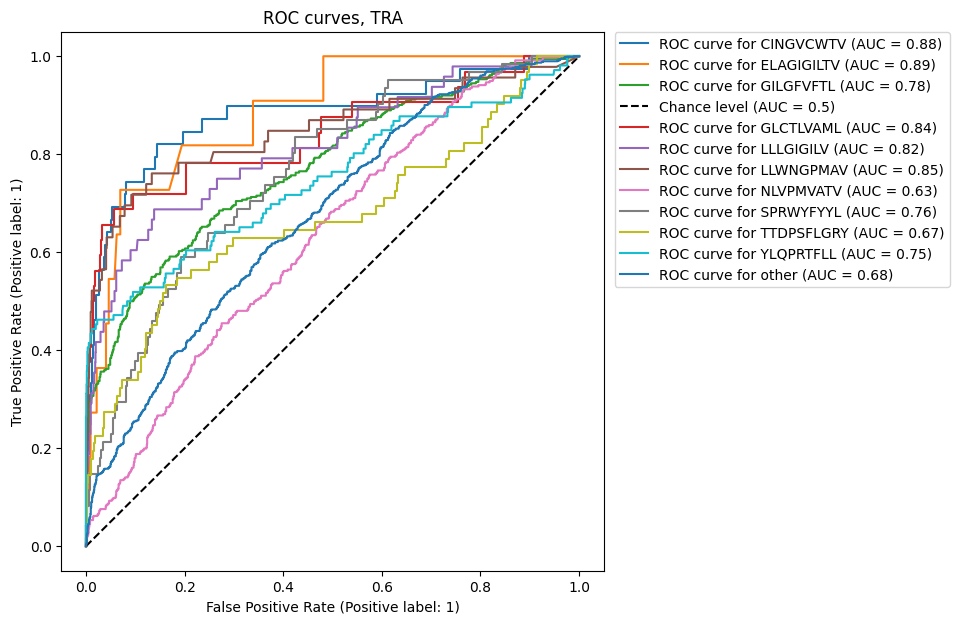

In [56]:
clf.roc_auc('TRA')

In [57]:
clf.roc_auc_proba_df['TRA'].sort_values('roc_auc')

class   roc_auc
6    NLVPMVATV  0.630858
8   TTDPSFLGRY  0.672240
10       other  0.675027
9    YLQPRTFLL  0.748080
7    SPRWYFYYL  0.762065
2    GILGFVFTL  0.775684
4    LLLGIGILV  0.815712
3    GLCTLVAML  0.841143
5    LLWNGPMAV  0.848505
0    CINGVCWTV  0.880545
1   ELAGIGILTV  0.885591

accuracy: 0.56
f1_weighted:0.65
precision:0.86
recall:0.56


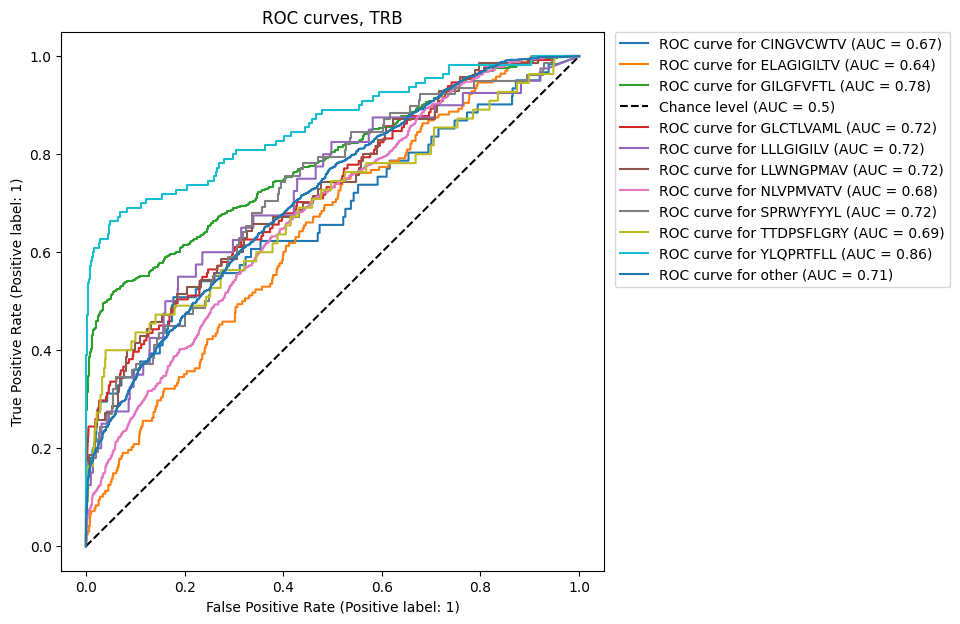

In [58]:
clf.roc_auc('TRB')

In [59]:
clf.roc_auc_proba_df['TRB'].sort_values('roc_auc')

class   roc_auc
1   ELAGIGILTV  0.644141
0    CINGVCWTV  0.674669
6    NLVPMVATV  0.679542
8   TTDPSFLGRY  0.692750
10       other  0.714711
5    LLWNGPMAV  0.720374
4    LLLGIGILV  0.720859
3    GLCTLVAML  0.721125
7    SPRWYFYYL  0.724963
2    GILGFVFTL  0.782847
9    YLQPRTFLL  0.856884

In [25]:
clf_all = TCRemb.TCRemb_clf('RF_all')
chain='TRA'
max_depth = 20
model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clf_all.clf(chain,tcremb, label, model=model,test_size=0.15)

Train accuracy: 0.9348973607038124
Test accuracy: 0.3593576965669989
macro: {'f1': 0.037332208241610175, 'precision': 0.031132359333164418, 'recall': 0.06411492665990046}
weighted: {'f1': 0.41747491139321, 'precision': 0.5730249174464699, 'recall': 0.3593576965669989}


In [26]:

chain='TRB'
max_depth = 20
model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clf_all.clf(chain,tcremb, label, model=model,test_size=0.15)

Train accuracy: 0.9431413663627054
Test accuracy: 0.3397790055248619
macro: {'f1': 0.060263508483447616, 'precision': 0.04984022148260091, 'recall': 0.11661494542218695}
weighted: {'f1': 0.39898508092636625, 'precision': 0.7696938766544988, 'recall': 0.3397790055248619}


In [50]:
clf_500 = TCRemb.TCRemb_clf('RF_freq_500')
chain='TRA'
max_depth = 20
model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clf_500.clf(chain,tcremb, str(label + '_freq_500'), model=model,test_size=0.15)

Train accuracy: 0.9733137829912023
Test accuracy: 0.46511627906976744
macro: {'f1': 0.3599265081050936, 'precision': 0.3112033933016937, 'recall': 0.49928079315785256}
weighted: {'f1': 0.4984751706125958, 'precision': 0.6200784935512256, 'recall': 0.46511627906976744}


In [51]:
chain='TRB'
max_depth = 20
model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clf_500.clf(chain,tcremb, str(label + '_freq_500'), model=model,test_size=0.15)

Train accuracy: 0.971375627834398
Test accuracy: 0.5461325966850828
macro: {'f1': 0.280768584459444, 'precision': 0.24561790517595558, 'recall': 0.5838798872961479}
weighted: {'f1': 0.618596198316942, 'precision': 0.8077928242774112, 'recall': 0.5461325966850828}


accuracy: 0.47
f1_weighted:0.5
precision:0.62
recall:0.47


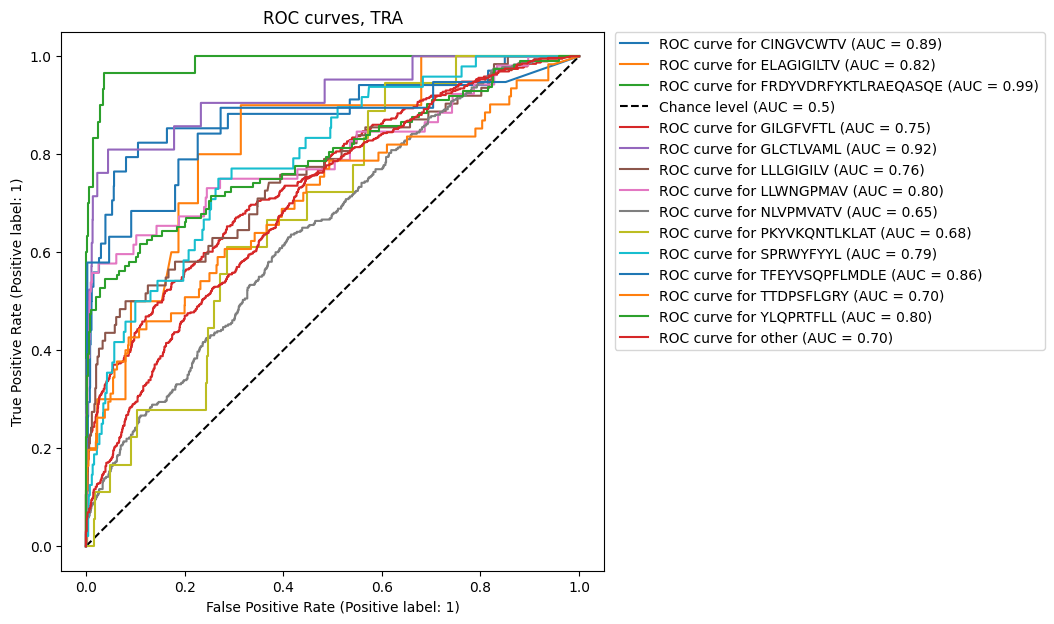

In [52]:
clf_500.roc_auc('TRA')

In [62]:
clf_500.roc_auc_proba_df['TRB'].sort_values('roc_auc')

class   roc_auc
1             ELAGIGILTV  0.644633
7              NLVPMVATV  0.689330
5              LLLGIGILV  0.707848
13                 other  0.710905
8          PKYVKQNTLKLAT  0.730024
6              LLWNGPMAV  0.738687
11            TTDPSFLGRY  0.759453
4              GLCTLVAML  0.760921
0              CINGVCWTV  0.785924
3              GILGFVFTL  0.803595
9              SPRWYFYYL  0.821387
12             YLQPRTFLL  0.891288
10        TFEYVSQPFLMDLE  0.893684
2   FRDYVDRFYKTLRAEQASQE  0.972792

accuracy: 0.55
f1_weighted:0.62
precision:0.81
recall:0.55


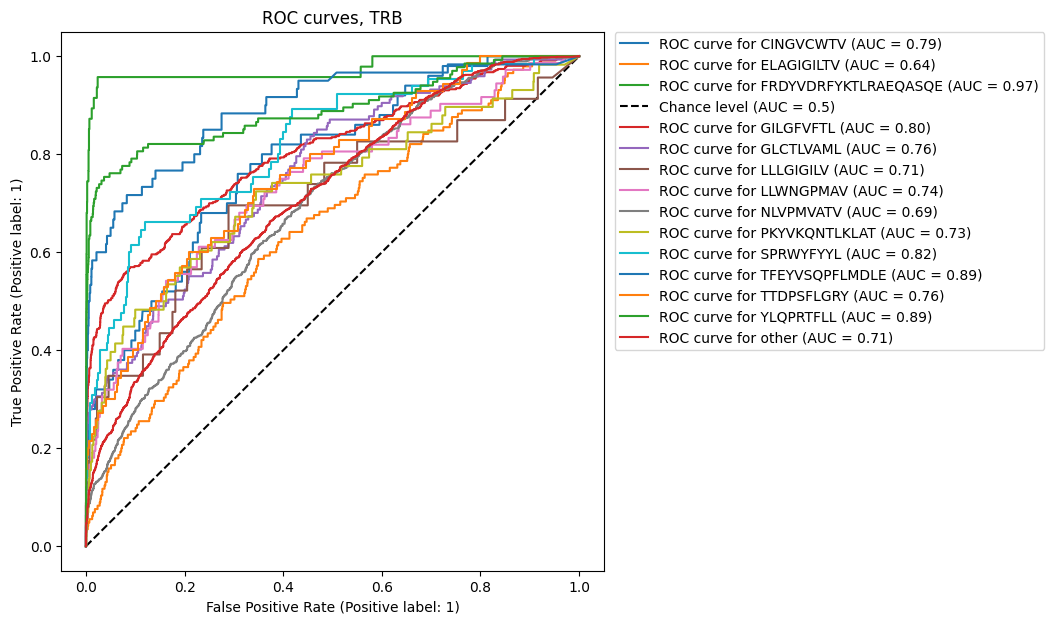

In [53]:
clf_500.roc_auc('TRB')

In [63]:
clf_100 = TCRemb.TCRemb_clf('RF_freq_100')
chain='TRA'
max_depth = 20
model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clf_100.clf(chain,tcremb, str(label + '_freq_100'), model=model,test_size=0.15)

Train accuracy: 0.9724340175953079
Test accuracy: 0.3853820598006645
macro: {'f1': 0.20265623372366806, 'precision': 0.16712937783072584, 'recall': 0.3195903583343941}
weighted: {'f1': 0.4038929796708792, 'precision': 0.45648099678254717, 'recall': 0.3853820598006645}


In [64]:

chain='TRB'
max_depth = 20
model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clf_100.clf(chain,tcremb, str(label + '_freq_100'), model=model,test_size=0.15)

Train accuracy: 0.9795679524064953
Test accuracy: 0.37596685082872927
macro: {'f1': 0.18172206575985597, 'precision': 0.14331505043970866, 'recall': 0.48213104413470853}
weighted: {'f1': 0.41405696847319207, 'precision': 0.5499677197958581, 'recall': 0.37596685082872927}


accuracy: 0.39
f1_weighted:0.4
precision:0.46
recall:0.39


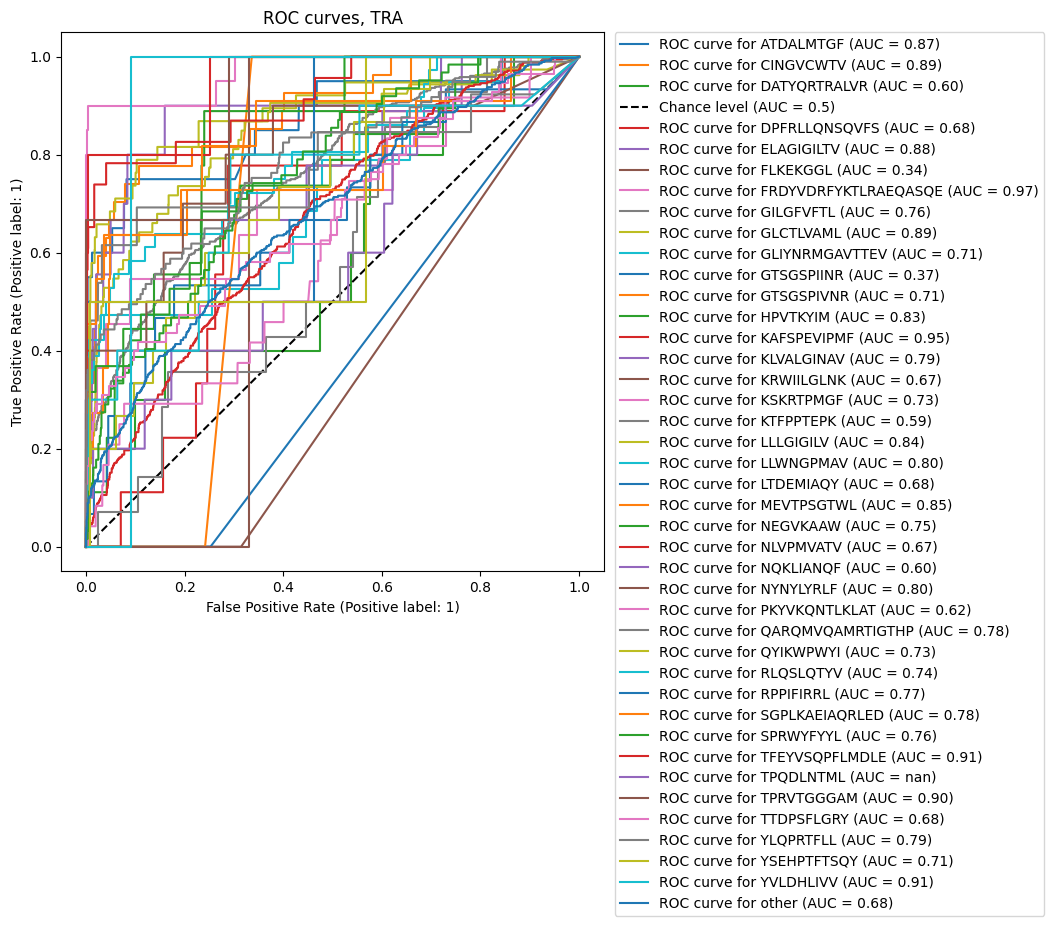

In [65]:
clf_100.roc_auc('TRA')

accuracy: 0.38
f1_weighted:0.41
precision:0.55
recall:0.38


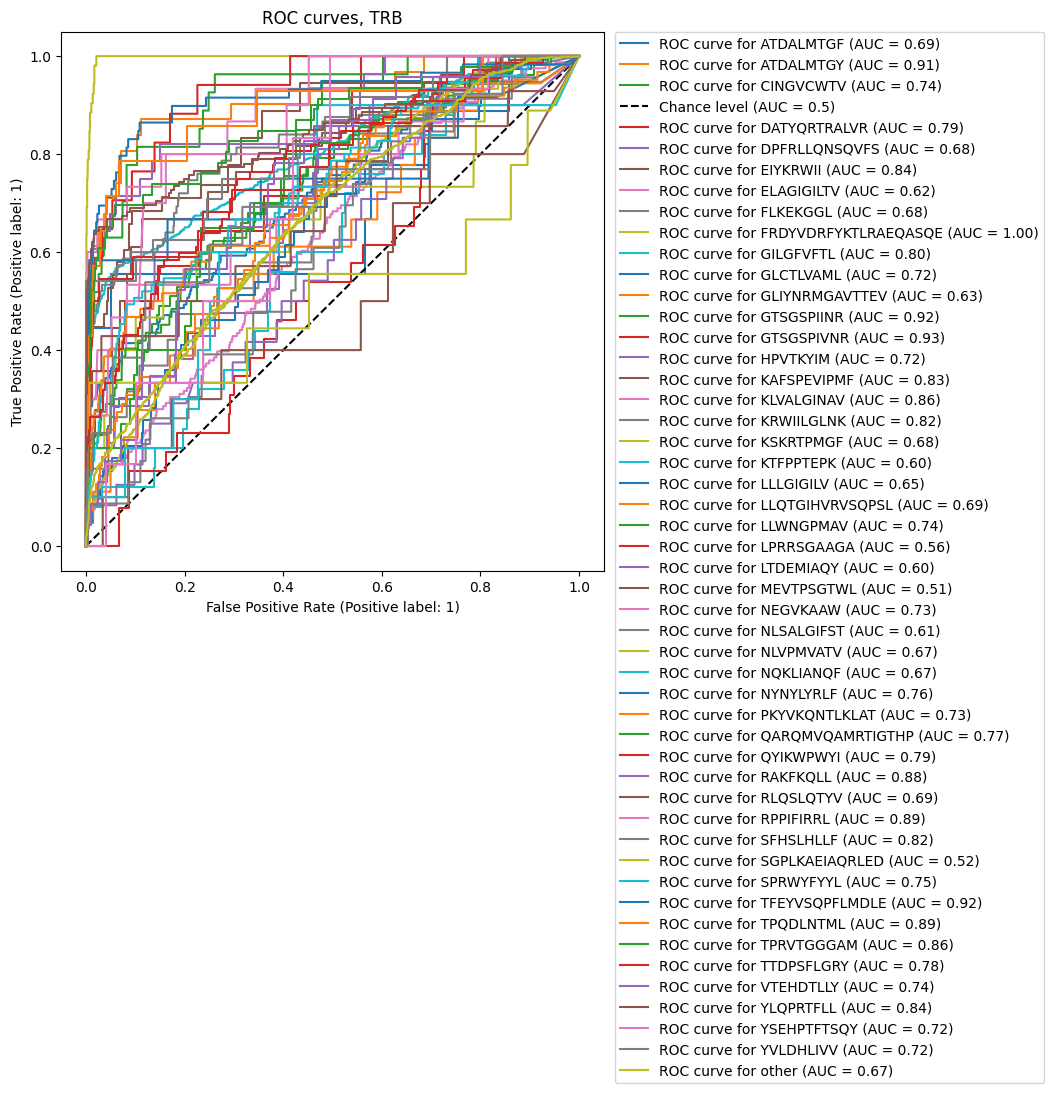

In [66]:
clf_100.roc_auc('TRB')

In [ ]:
clf = TCRemb.TCRemb_clf_bind('test')
chain='TRA'
max_depth = 20
model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clf.clf(chain,tcremb, label,model=model,labels_list = ['GILGFVFTL','YLQPRTFLL','GLCTLVAML','NLVPMVATV'],test_size=0.15)

In [ ]:
from sklearn.model_selection import cross_val_score



In [ ]:
def clf_model(model, label_np, proc_df, annotation_id_column, chain, test_size = 0.3 ,show_legend=True, ax=None):
    
    y_train, y_test,X_train, X_test,  = train_test_split(label_np, proc_df.drop(annotation_id_column, axis=1, errors = 'ignore') ,test_size=test_size)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)   
    print(f'Train accuracy: {model.score(X_train,y_train)}')
    print(f'Test accuracy: {model.score(X_test,y_test)}')
    print(f"macro: {TCRemb_code2.clsf_metrics(pred,y_test,'macro')}")
    print(f"weighted: {TCRemb_code2.clsf_metrics(pred,y_test,'weighted')}")
    
    print(f'cross_val_score: {cross_val_score(model, proc_df.drop(annotation_id_column, axis=1, errors = "ignore"), label_np, cv=5, scoring="accuracy")}')
    print(f'cross_val_score f1_weighted: {cross_val_score(model, proc_df.drop(annotation_id_column, axis=1, errors = "ignore"), label_np, cv=5, scoring="f1_weighted")}')
    
    
    roc_auc_df = TCRemb_code2.roc_auc(model, pred, y_test, X_test, chain, show_legend, ax)
    
    return model, roc_auc_df.sort_values('roc_auc',ascending=False)

In [ ]:
clsf_dict = {}

In [ ]:
model_name = 'RF_label_20'
label_cl = label+'_freq_20'
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
chain = 'TRA'
max_depth = 20


y_data = tcremb['annot'][chain][label]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)



In [ ]:
chain = 'TRB'
max_depth = 20

y_data = tcremb['annot'][chain][label]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)


In [ ]:
model_name = 'RF_label_100'
label_cl = label+'_freq_100'
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
chain = 'TRA'
max_depth = 20


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = clf_model(model,y_data, X_data , annotation_id, chain)



In [ ]:
chain = 'TRB'
max_depth = 20

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = clf_model(model,y_data, X_data , annotation_id, chain,show_legend=False)


In [ ]:
model_name = 'RF_label_200'
label_cl = label+'_freq_200'
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
chain = 'TRA'
max_depth = 20


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)



In [ ]:
chain = 'TRB'
max_depth = 20

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)


In [ ]:
model_name = 'RF_label_300'
label_cl = label+'_freq_300'
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
chain = 'TRA'
max_depth = 20


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)



In [ ]:
chain = 'TRB'
max_depth = 20

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain,show_legend=False)


In [ ]:
model_name = 'RF_label_500'
label_cl = label+'_freq_300'
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
chain = 'TRA'
max_depth = 20


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)



In [ ]:
chain = 'TRB'
max_depth = 20

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)


In [ ]:
model_name = 'RF_label_1000'
label_cl = label+'_freq_1000'
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
chain = 'TRA'
max_depth = 20


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = clf_model(model,y_data, X_data , annotation_id, chain) ##TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)



In [ ]:
chain = 'TRB'
max_depth = 20

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = clf_model(model,y_data, X_data , annotation_id, chain) ##TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)


In [ ]:
model_name = 'RF_label_high'
label_cl = label_high
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
chain = 'TRA'
max_depth = 20


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)



In [ ]:
chain = 'TRB'
max_depth = 20

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)


In [ ]:
model_name = 'RF_label_high_s'
label_cl = label_high_s
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
chain = 'TRA'
max_depth = 20


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)



In [ ]:
chain = 'TRB'
max_depth = 20

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)


### SVM

In [ ]:
model_name = 'SVM_label_high'
label_cl = label_high
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
from sklearn.svm import SVC

In [ ]:
chain = 'TRA'
c = 6

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]



model = SVC(C=c, random_state=0,probability=True)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain],y_train, y_test,X_train, X_test = TCRemb_code2.clf_model_tt(model,y_data, X_data , annotation_id, chain, test_size = 0.15)


In [ ]:
chain = 'TRB'
c = 6

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]



model = SVC(C=c, random_state=0,probability=True)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain],y_train, y_test,X_train, X_test = TCRemb_code2.clf_model_tt(model,y_data, X_data , annotation_id, chain, test_size = 0.15)


In [ ]:
model_name = 'SVM_label_300'
label_cl = label+'_freq_300'
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
chain = 'TRA'
c = 6

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]



model = SVC(C=c, random_state=0,probability=True, kernel='poly')
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)




In [ ]:
chain = 'TRB'
c = 6

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]



model = SVC(C=c, random_state=0,probability=True, kernel='poly')
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)




In [ ]:
model_name = 'SVM_label_500'
label_cl = label+'_freq_500'
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
chain = 'TRA'
c = 6

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]



model = SVC(C=c, random_state=0,probability=True, kernel='poly')
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)




In [ ]:
chain = 'TRB'
c = 6

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]



model = SVC(C=c, random_state=0,probability=True, kernel='poly')
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)


In [ ]:
model_name = 'SVM_label_1000'
label_cl = label+'_freq_1000'
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
chain = 'TRA'
c = 6

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]



model = SVC(C=c, random_state=0,probability=True, kernel='poly')
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)


In [ ]:
chain = 'TRB'
c = 6

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]



model = SVC(C=c, random_state=0,probability=True, kernel='poly')
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)


In [ ]:
model_name = 'SVM_label_high_s'
label_cl = label_high_s
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
chain = 'TRA'
c = 6

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]



model = SVC(C=c, random_state=0,probability=True, kernel='poly')
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)




In [ ]:
chain = 'TRB'
c = 6

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]



model = SVC(C=c, random_state=0,probability=True)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)


In [ ]:
model_name = 'SVM_ovr'
label_cl = label
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
chain = 'TRB'
c = 6

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]



model = OneVsRestClassifier(SVC())
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)

In [ ]:
pd.DataFrame(clsf_dict[model_name]['roc_auc'][chain]).head(30)

In [ ]:
## with label_high
chain = 'TRB'
model_name = 'SVC_ovr'
clsf_dict[model_name]= {'model':{}, 'roc_auc':{}}

clf_rf_model = OneVsRestClassifier(SVC())
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code.clf_model(clf_rf_model,pca_res_annot_dict[chain][label_high], pca_res_dict[chain] , annotation_id_column_dict[chain], 0.3)


In [ ]:
pd.DataFrame(clsf_dict[model_name]['roc_auc'][chain]).head(30)

In [39]:
!pwd

/home/ykremlyakova/projects/tcr_emb_mirpy_old


## Fig

In [57]:
t

antigen.epitope_high_count_1000   cdr3
0                      ELAGIGILTV   1159
1                       GILGFVFTL   5574
2                       GLCTLVAML   1140
3                       NLVPMVATV   7059
4                       YLQPRTFLL   1566
5                           other  19695

([<matplotlib.patches.Wedge at 0x7fda456f6ed0>,
 [Text(1.0944382197910936, 0.11047616512398618, 'ELAGIGILTV'),
  Text(0.851837011373225, 0.6959696157554095, 'GILGFVFTL'),
  Text(0.3282015748821189, 1.0498970074463958, 'GLCTLVAML'),
  Text(-0.4371614909693769, 1.0094007285580051, 'NLVPMVATV'),
  Text(-1.0073213862028194, 0.4419316970963164, 'YLQPRTFLL'),
  Text(-0.15213737562761476, -1.0894283909175226, 'other')])

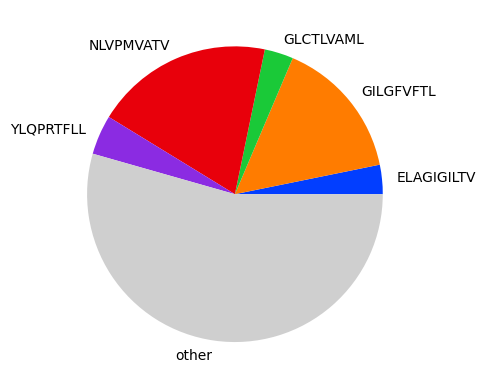

In [63]:
t = pd.DataFrame(data_preped.groupby(str(label+'_freq_1000'))['cdr3aa'].count().reset_index())
custom_palette = ml_utils.make_custom_palette(label_freq_dict[str(label+'_freq_1000')])
plt.pie(t['cdr3aa'],labels=t['antigen.epitope_freq_1000'],colors=custom_palette.values())

NameError: name 'clf' is not defined

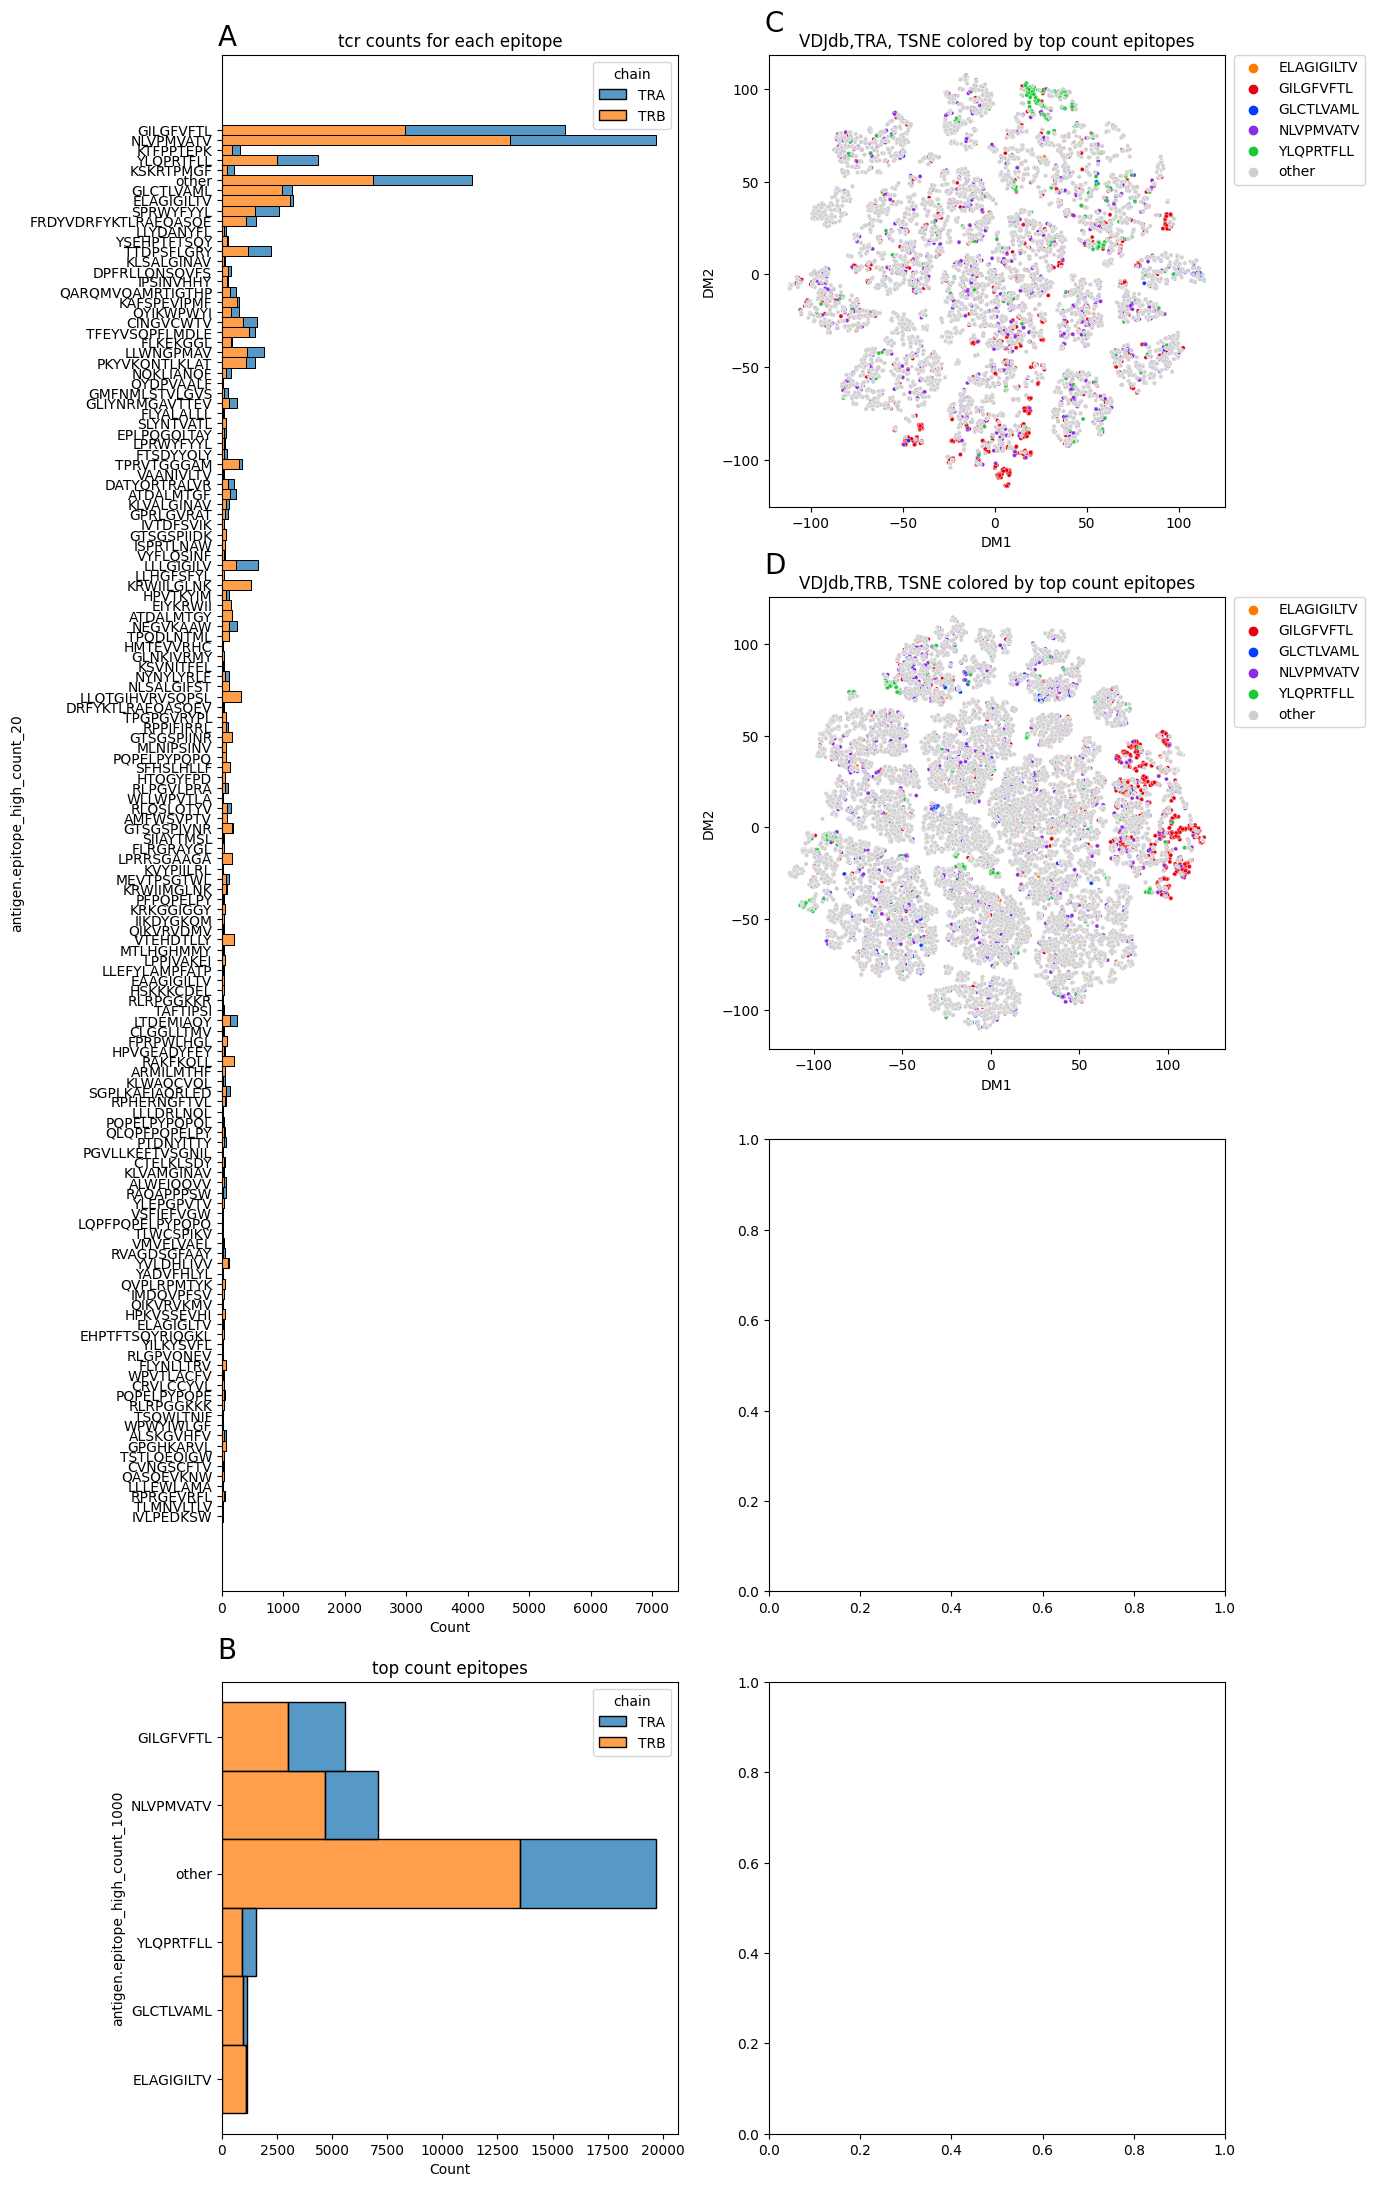

In [65]:

custom_palette = ml_utils.make_custom_palette(label_freq_dict[str(label+'_freq_1000')])

fig = plt.figure(figsize=(20,27))

delta_x=-0.01
delta_y=1.1
font_size=20


gs00 = fig.add_gridspec(4, 3)

ax1 = fig.add_subplot(gs00[:3, 0])
ax2 = fig.add_subplot(gs00[3, 0])
ax3 = fig.add_subplot(gs00[0, 1])
ax4 = fig.add_subplot(gs00[1, 1])
ax5 = fig.add_subplot(gs00[2, 1])
ax6 = fig.add_subplot(gs00[3, 1])


sns.histplot(data = data_preped, y = str(label+'_freq_20'),hue='chain',multiple='stack', ax=ax1)

ax1.text(delta_x, delta_y - 0.08, 'A',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax1.transAxes,
        size=font_size)
ax1.set_title('tcr counts for each epitope')

sns.histplot(data = data_preped, y = str(label+'_freq_1000'),hue='chain',multiple='stack', ax=ax2)

ax2.text(delta_x, delta_y, 'B',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax2.transAxes,
        size=font_size)
ax2.set_title('top count epitopes')

chain = 'TRA'
ml_utils.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), str(label+'_freq_1000'),f'VDJdb,{chain}, TSNE colored by top count epitopes',custom_palette=custom_palette,ax=ax3)
ax3.text(delta_x, delta_y, 'C',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax3.transAxes,
        size=font_size)

chain = 'TRB'
ml_utils.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), str(label+'_freq_1000'), f'VDJdb,{chain}, TSNE colored by top count epitopes',custom_palette=custom_palette,ax=ax4)

ax4.text(delta_x, delta_y, 'D',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax4.transAxes,
        size=font_size)



clf.roc_auc('TRA',ax=ax5)

ax5.text(delta_x, delta_y, 'E',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax5.transAxes,
        size=font_size)


clf.roc_auc('TRB',ax=ax6)

ax6.text(delta_x, delta_y, 'F',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax6.transAxes,
        size=font_size)

#plt.figtext(0.1, 0.001, 'Your-plot-metadata', ha='center', va='center')
#plt.savefig("tcremb_outputs/figures/fig2.svg")
#plt.savefig("tcremb_outputs/figures/fig2.pdf")
#plt.savefig("tcremb_outputs/figures/fig2.png")
plt.show()





In [ ]:

fig = plt.figure(figsize=(20,27))

delta_x=-0.01
delta_y=1.1
font_size=20


gs00 = fig.add_gridspec(4, 3)

ax1 = fig.add_subplot(gs00[:3, 0])
ax2 = fig.add_subplot(gs00[3, 0])
ax3 = fig.add_subplot(gs00[0, 1])
ax4 = fig.add_subplot(gs00[1, 1])
ax5 = fig.add_subplot(gs00[2, 1])
ax6 = fig.add_subplot(gs00[3, 1])


sns.histplot(data = data_preped, y = str(label+'_freq_20'),hue='chain',multiple='stack', ax=ax1)

ax1.text(delta_x, delta_y - 0.08, 'A',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax1.transAxes,
        size=font_size)
ax1.set_title('tcr counts for each epitope')

sns.histplot(data = data_preped, y = str(label+'_freq_1000'),hue='chain',multiple='stack', ax=ax2)

ax2.text(delta_x, delta_y, 'B',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax2.transAxes,
        size=font_size)
ax2.set_title('top count epitopes')

chain = 'TRA'
TCRemb_code3.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), str(label+'_freq_1000'),f'VDJdb,{chain}, TSNE colored by top count epitopes',custom_palette=custom_palette,ax=ax3)
ax3.text(delta_x, delta_y, 'C',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax3.transAxes,
        size=font_size)

chain = 'TRB'
TCRemb_code3.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), str(label+'_freq_1000'), f'VDJdb,{chain}, TSNE colored by top count epitopes',custom_palette=custom_palette,ax=ax4)

ax4.text(delta_x, delta_y, 'D',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax4.transAxes,
        size=font_size)


label_cl = label+'_freq_1000'
model_name = 'RF_' + label_cl
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

chain = 'TRA'
max_depth = 20


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = clf_model(model,y_data, X_data , annotation_id, chain,ax=ax5)

ax5.text(delta_x, delta_y, 'E',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax5.transAxes,
        size=font_size)


chain = 'TRB'
max_depth = 20


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = clf_model(model,y_data, X_data , annotation_id, chain,ax=ax6)

ax6.text(delta_x, delta_y, 'F',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax6.transAxes,
        size=font_size)

#plt.figtext(0.1, 0.001, 'Your-plot-metadata', ha='center', va='center')
#plt.savefig("tcremb_outputs/figures/fig2.svg")
#plt.savefig("tcremb_outputs/figures/fig2.pdf")
plt.savefig("tcremb_outputs/figures/fig2.png")
plt.show()





In [ ]:

fig = plt.figure(figsize=(20,27))

delta_x=-0.01
delta_y=1.1
font_size=20


gs00 = fig.add_gridspec(4, 3)

ax1 = fig.add_subplot(gs00[:3, 0])
ax2 = fig.add_subplot(gs00[3, 0])
ax3 = fig.add_subplot(gs00[0, 1])
ax4 = fig.add_subplot(gs00[1, 1])
ax5 = fig.add_subplot(gs00[2, 1])
ax6 = fig.add_subplot(gs00[3, 1])


sns.histplot(data = data_preped, y = str(label+'_freq_20'),hue='chain',multiple='stack', ax=ax1)

ax1.text(delta_x, delta_y - 0.08, 'A',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax1.transAxes,
        size=font_size)
ax1.set_title('tcr counts for each epitope')

sns.histplot(data = data_preped, y = str(label+'_freq_1000'),hue='chain',multiple='stack', ax=ax2)

ax2.text(delta_x, delta_y, 'B',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax2.transAxes,
        size=font_size)
ax2.set_title('top count epitopes')

chain = 'TRA'
TCRemb_code3.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), str(label+'_freq_1000'),f'VDJdb,{chain}, TSNE colored by top count epitopes',custom_palette=custom_palette,ax=ax3)
ax3.text(delta_x, delta_y, 'C',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax3.transAxes,
        size=font_size)

chain = 'TRB'
TCRemb_code3.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), str(label+'_freq_1000'), f'VDJdb,{chain}, TSNE colored by top count epitopes',custom_palette=custom_palette,ax=ax4)

ax4.text(delta_x, delta_y, 'D',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax4.transAxes,
        size=font_size)


label_cl = label+'_freq_1000'
model_name = 'RF_' + label_cl
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

chain = 'TRA'
max_depth = 20


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = clf_model_proba(model,y_data, X_data , annotation_id, chain,ax=ax5)

ax5.text(delta_x, delta_y, 'E',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax5.transAxes,
        size=font_size)


chain = 'TRB'
max_depth = 20


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = clf_model_proba(model,y_data, X_data , annotation_id, chain,ax=ax6)

ax6.text(delta_x, delta_y, 'F',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax6.transAxes,
        size=font_size)


#plt.savefig("tcremb_outputs/figures/fig2.svg")
#plt.savefig("tcremb_outputs/figures/fig2.pdf")
#plt.savefig("tcremb_outputs/figures/fig2.png")
plt.show()





In [ ]:
label_high_s_1000

In [ ]:

max_depth = 100
fig = plt.figure(figsize=(20,22))

delta_x=-0.01
delta_y=1.1
font_size=20

gs00 = fig.add_gridspec(4, 3)

ax1 = fig.add_subplot(gs00[:3, 0])
ax2 = fig.add_subplot(gs00[3, 0])
ax3 = fig.add_subplot(gs00[0, 1])
ax4 = fig.add_subplot(gs00[1, 1])
ax5 = fig.add_subplot(gs00[2, 1])
ax6 = fig.add_subplot(gs00[3, 1])

sns.histplot(data = data_preped, y = 'antigen.species',hue='chain',multiple='stack', ax=ax1)

ax1.text(delta_x, delta_y - 0.08, 'A',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax1.transAxes,
        size=font_size)
ax1.set_title('tcr counts for each species')

sns.histplot(data = data_preped, y = label_high_s_1000,hue='chain',multiple='stack', ax=ax2)

ax2.text(delta_x, delta_y, 'B',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax2.transAxes,
        size=font_size)
ax2.set_title('top count species')

chain = 'TRA'
TCRemb_code3.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), str(label_high_s_1000),f'VDJdb,{chain}, TSNE colored by top antigen.species',ax=ax3)

ax3.text(delta_x, delta_y, 'C',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax3.transAxes,
        size=font_size)

chain = 'TRB'
TCRemb_code3.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), str(label_high_s_1000), f'VDJdb,{chain}, TSNE colored by top antigen.species',ax=ax4)

ax4.text(delta_x, delta_y, 'D',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax4.transAxes,
        size=font_size)


label_cl = label_high_s_1000
model_name = 'RF_' + label_cl
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

chain = 'TRA'



y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = clf_model_proba(model,y_data, X_data , annotation_id, chain,ax=ax5)

ax5.text(delta_x, delta_y, 'E',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax5.transAxes,
        size=font_size)

chain = 'TRB'



y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = clf_model_proba(model,y_data, X_data , annotation_id, chain,ax=ax6)

ax6.text(delta_x, delta_y, 'F',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax6.transAxes,
        size=font_size)


plt.savefig("tcremb_outputs/figures/fig2.2.png")
plt.show()

In [ ]:

fig = plt.figure(figsize=(20,22))

delta_x=-0.01
delta_y=1.1
font_size=20

gs00 = fig.add_gridspec(4, 3)

ax1 = fig.add_subplot(gs00[:3, 0])
ax2 = fig.add_subplot(gs00[3, 0])
ax3 = fig.add_subplot(gs00[0, 1])
ax4 = fig.add_subplot(gs00[1, 1])
ax5 = fig.add_subplot(gs00[2, 1])
ax6 = fig.add_subplot(gs00[3, 1])

sns.histplot(data = data_preped, y = 'antigen.species',hue='chain',multiple='stack', ax=ax1)

ax1.text(delta_x, delta_y - 0.08, 'A',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax1.transAxes,
        size=font_size)
ax1.set_title('tcr counts for each species')

sns.histplot(data = data_preped, y = label_high_s_1000,hue='chain',multiple='stack', ax=ax2)

ax2.text(delta_x, delta_y, 'B',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax2.transAxes,
        size=font_size)
ax2.set_title('top count species')

chain = 'TRA'
TCRemb_code3.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), str(label_high_s_1000),f'VDJdb,{chain}, TSNE colored by top antigen.species',ax=ax3)

ax3.text(delta_x, delta_y, 'C',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax3.transAxes,
        size=font_size)

chain = 'TRB'
TCRemb_code3.tsne_plot(pd.merge(tcremb.tsne[chain],tcremb.annot[chain]), str(label_high_s_1000), f'VDJdb,{chain}, TSNE colored by top antigen.species',ax=ax4)

ax4.text(delta_x, delta_y, 'D',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax4.transAxes,
        size=font_size)


label_cl = label_high_s_1000
model_name = 'RF_' + label_cl
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

chain = 'TRA'
c=5


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = clf_model_proba(model,y_data, X_data , annotation_id, chain,ax=ax5)

ax5.text(delta_x, delta_y, 'E',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax5.transAxes,
        size=font_size)

chain = 'TRB'



y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = clf_model_proba(model,y_data, X_data , annotation_id, chain,ax=ax6)

ax6.text(delta_x, delta_y, 'F',
     horizontalalignment='left',
     verticalalignment='top',
    transform=ax6.transAxes,
        size=font_size)


plt.savefig("tcremb_outputs/figures/fig2.2.png")
plt.show()

In [ ]:
chain = 'TRA'
TCRemb_code2.tsne_plot(pd.concat([tcremb['tsne'][chain],tcremb['annot'][chain]],axis=1), str(label+'_freq_1000'), f'VDJdb,{chain}', f'TSNE colored by {str(label+"_freq_1000")}')

In [ ]:
chain = 'TRB'
TCRemb_code2.tsne_plot(pd.concat([tcremb['tsne'][chain],tcremb['annot'][chain]],axis=1), str(label+'_freq_1000'), f'VDJdb,{chain}', f'TSNE colored by {str(label+"_freq_1000")}')

In [ ]:
chain = 'TRB'
TCRemb_code2.tsne_plot(pd.concat([tcremb['tsne'][chain],tcremb['annot'][chain]],axis=1), str(label+'_freq_200'), f'VDJdb,{chain}', f'TSNE colored by {str(label+"_freq_200")}')

In [ ]:
model_name = 'RF_label_1000'
label_cl = label+'_freq_1000'
clsf_dict[model_name]= {'model':{},'roc_auc':{}}

chain = 'TRA'
max_depth = 20


y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)

chain = 'TRB'
max_depth = 20

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]


model = RandomForestClassifier(max_depth=max_depth, random_state=0)
clsf_dict[model_name]['model'][chain], clsf_dict[model_name]['roc_auc'][chain] = TCRemb_code2.clf_model(model,y_data, X_data , annotation_id, chain)


In [ ]:
label_cl = label
model_name = 'KMeans'
threshold = 0.6
clstr_dict[model_name]= {'binom_res':{},'clstr_metrics':{},'binom_res_train':{},'clstr_metrics_train':{}}
tcremb['clstr_labels'][model_name]={}




chain = 'TRA'
n_clusters = 5295
random_state = 8

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]#.drop(annotation_id, axis=1, errors = 'ignore')

model =  KMeans(n_clusters=n_clusters, random_state=random_state)
tcremb['clstr_labels'][model_name][chain] = TCRemb_code2.clstr_model(model, X_data , annotation_id)

clstr_dict[model_name]['binom_res'][chain] = TCRemb_code2.binominal_test(pd.merge(tcremb['clstr_labels'][model_name][chain],tcremb['annot'][chain]), 'cluster', label_cl)
clstr_dict[model_name]['binom_res'][chain]['enriched_clstr'] =clstr_dict[model_name]['binom_res'][chain].apply(lambda x:1 
                                                                                                               if (x.fraction_matched>=threshold)
                                                                                                               and (x.total_cluster>2) else 0,axis=1)
clstr_dict[model_name]['clstr_metrics'][chain] = TCRemb_code2.clstr_metrics(tcremb['annot'][chain][label_cl],tcremb['clstr_labels'][model_name][chain]['cluster'])



tcremb['clstr_labels'][model_name][chain] = tcremb['clstr_labels'][model_name][chain].merge(clstr_dict[model_name]['binom_res'][chain].rename({label_cl:'label_cluster'},axis=1)
                                                                                            , on='cluster',how='left').sort_values(annotation_id).reset_index(drop=True)

print('mean fraction_matched: ' + str(statistics.mean(clstr_dict[model_name]['binom_res'][chain]['fraction_matched'])))
print('median fraction_matched: ' + str(statistics.median(clstr_dict[model_name]['binom_res'][chain]['fraction_matched'])))
print(clstr_dict[model_name]['clstr_metrics'][chain])


sns.histplot(tcremb['clstr_labels'][model_name][chain]['enriched_clstr'].astype(str))
plt.title('count of tcrs in enriched clusters')
TCRemb_code2.tsne_plot(pd.merge(tcremb['tsne'][chain],tcremb['clstr_labels'][model_name][chain],on=annotation_id), 'enriched_clstr', f'10x ,{chain}', f'TSNE colored by enriched_clstr', True)

chain = 'TRB'
n_clusters = 10616
random_state = 8

y_data = tcremb['annot'][chain][label_cl]
X_data = tcremb['pca'][chain]#.drop(annotation_id, axis=1, errors = 'ignore')

model =  KMeans(n_clusters=n_clusters, random_state=random_state)
tcremb['clstr_labels'][model_name][chain] = TCRemb_code2.clstr_model(model, X_data , annotation_id)

clstr_dict[model_name]['binom_res'][chain] = TCRemb_code2.binominal_test(pd.merge(tcremb['clstr_labels'][model_name][chain],tcremb['annot'][chain]), 'cluster', label_cl)
clstr_dict[model_name]['binom_res'][chain]['enriched_clstr'] =clstr_dict[model_name]['binom_res'][chain].apply(lambda x:1 
                                                                                                               if (x.fraction_matched>=threshold)
                                                                                                               and (x.total_cluster>2) else 0,axis=1)
clstr_dict[model_name]['clstr_metrics'][chain] = TCRemb_code2.clstr_metrics(tcremb['annot'][chain][label_cl],tcremb['clstr_labels'][model_name][chain]['cluster'])



tcremb['clstr_labels'][model_name][chain] = tcremb['clstr_labels'][model_name][chain].merge(clstr_dict[model_name]['binom_res'][chain].rename({label_cl:'label_cluster'},axis=1)
                                                                                            , on='cluster',how='left').sort_values(annotation_id).reset_index(drop=True)

print('mean fraction_matched: ' + str(statistics.mean(clstr_dict[model_name]['binom_res'][chain]['fraction_matched'])))
print('median fraction_matched: ' + str(statistics.median(clstr_dict[model_name]['binom_res'][chain]['fraction_matched'])))
print(clstr_dict[model_name]['clstr_metrics'][chain])


sns.histplot(tcremb['clstr_labels'][model_name][chain]['enriched_clstr'].astype(str))
plt.title('count of tcrs in enriched clusters')
TCRemb_code2.tsne_plot(pd.merge(tcremb['tsne'][chain],tcremb['clstr_labels'][model_name][chain],on=annotation_id), 'enriched_clstr', f'10x ,{chain}', f'TSNE colored by enriched_clstr', True)
